# **Airline Passenger Satisfaction**


# ![img](https://storage.googleapis.com/kaggle-datasets-images/522275/959195/b0e445e8d51cbbb098917a006378d829/dataset-cover.png?t=2020-02-20-16-56-51)

# About Dataset


## Context
This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can you predict passenger satisfaction?

## Content

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

Note that this data set was modified from this dataset by John D here. It has been cleaned up for the purposes of classification.

# Exploratory Data Analysis

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

import warnings
# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning, module='seaborn')


## Understanding Data

In [2]:
df=pd.read_csv("train.csv")
df2=pd.read_csv("test.csv")

df=pd.concat([df,df2],axis=0)

In [3]:
df.shape

(129880, 25)

In [4]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


We notice that we have two column with the same job (Unnamed: 0, id) , so we decide to drop Unnamed: 0 column

In [5]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [6]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

In [7]:
#df2.isnull().sum()

In [8]:
df.duplicated().sum()

0

In [9]:
df.count()

Unnamed: 0                           129880
id                                   129880
Gender                               129880
Customer Type                        129880
Age                                  129880
Type of Travel                       129880
Class                                129880
Flight Distance                      129880
Inflight wifi service                129880
Departure/Arrival time convenient    129880
Ease of Online booking               129880
Gate location                        129880
Food and drink                       129880
Online boarding                      129880
Seat comfort                         129880
Inflight entertainment               129880
On-board service                     129880
Leg room service                     129880
Baggage handling                     129880
Checkin service                      129880
Inflight service                     129880
Cleanliness                          129880
Departure Delay in Minutes      

In [10]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,44158.700000,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,31207.377062,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16234.750000,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38963.500000,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71433.250000,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      129880 non

In [12]:
df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True, errors='ignore')
#df2.drop(['Unnamed: 0', 'id'], axis=1, inplace=True, errors='ignore')



In [13]:
df.describe(include='all')

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,129880,129880,129880.000000,129880,129880,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,...,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880
unique,2,2,NaN,2,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral or dissatisfied
freq,65899,106100,NaN,89693,62160,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73452
mean,NaN,NaN,39.427957,NaN,NaN,1190.316392,2.728696,3.057599,2.756876,2.976925,...,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129,NaN
std,NaN,NaN,15.119360,NaN,NaN,997.452477,1.329340,1.526741,1.401740,1.278520,...,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650,NaN
min,NaN,NaN,7.000000,NaN,NaN,31.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,27.000000,NaN,NaN,414.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,NaN
50%,NaN,NaN,40.000000,NaN,NaN,844.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,NaN
75%,NaN,NaN,51.000000,NaN,NaN,1744.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,NaN


In [14]:
df.shape

(129880, 23)

### Distribution of Data

In [15]:

for column in df.columns:
    unique_values = df[column].nunique()
    print(f"Column: {column} : {unique_values}")

Column: Gender : 2
Column: Customer Type : 2
Column: Age : 75
Column: Type of Travel : 2
Column: Class : 3
Column: Flight Distance : 3821
Column: Inflight wifi service : 6
Column: Departure/Arrival time convenient : 6
Column: Ease of Online booking : 6
Column: Gate location : 6
Column: Food and drink : 6
Column: Online boarding : 6
Column: Seat comfort : 6
Column: Inflight entertainment : 6
Column: On-board service : 6
Column: Leg room service : 6
Column: Baggage handling : 5
Column: Checkin service : 6
Column: Inflight service : 6
Column: Cleanliness : 6
Column: Departure Delay in Minutes : 466
Column: Arrival Delay in Minutes : 472
Column: satisfaction : 2


In [16]:
numerical_columns=["Arrival Delay in Minutes","Departure Delay in Minutes","Flight Distance","Age"]
ctegorical_columns=df.drop(columns=numerical_columns)

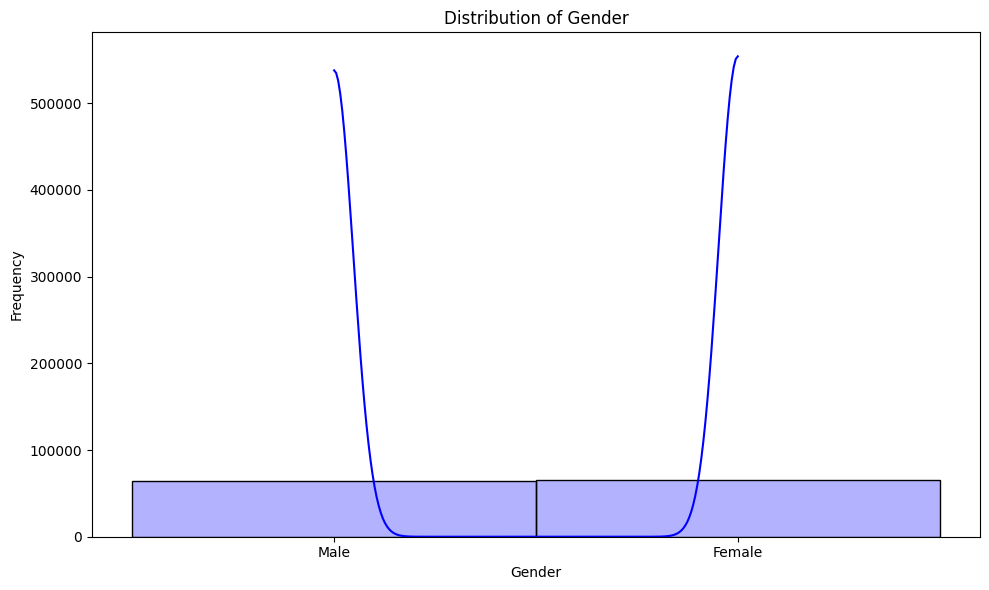

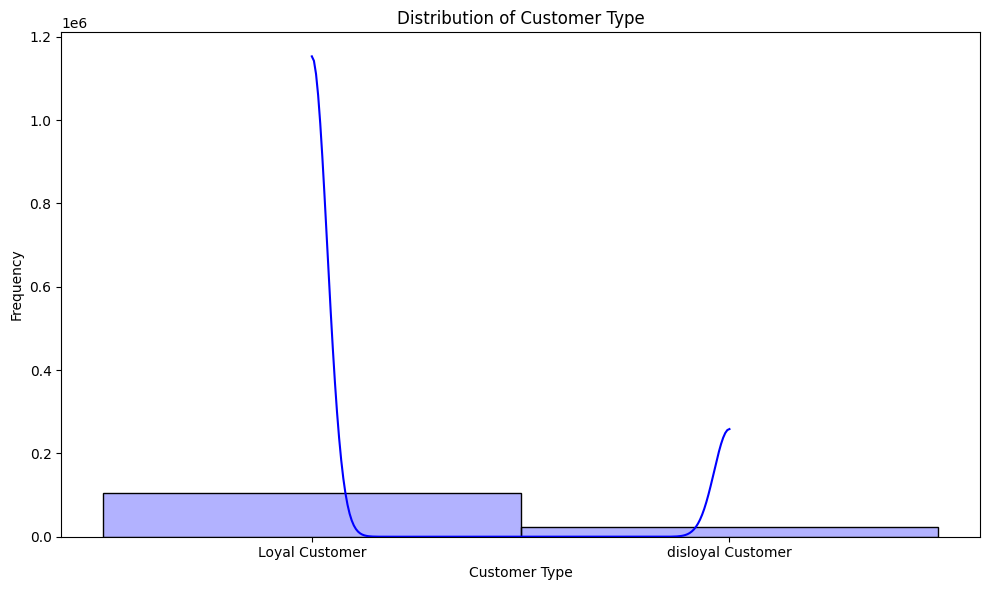

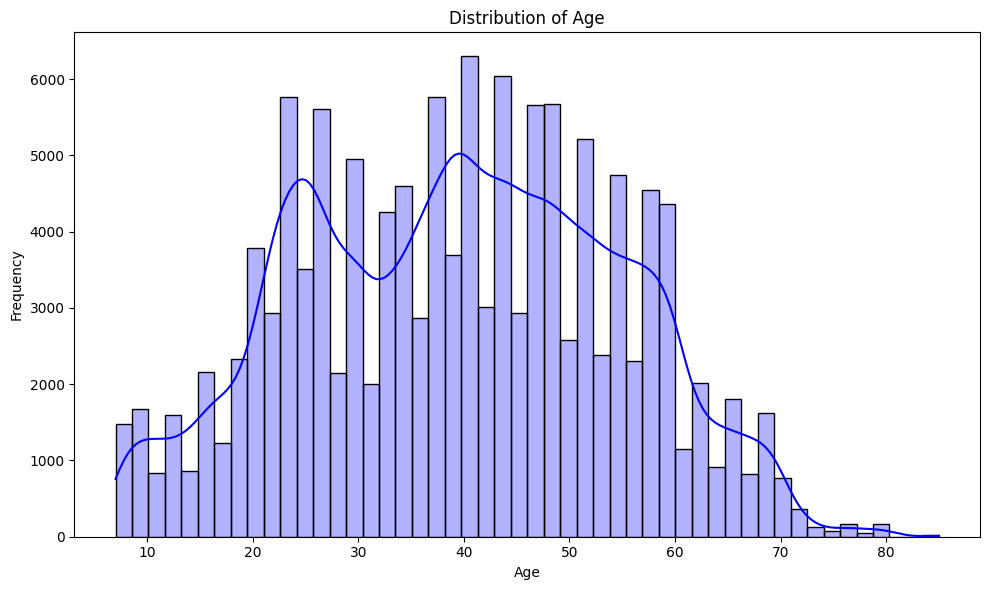

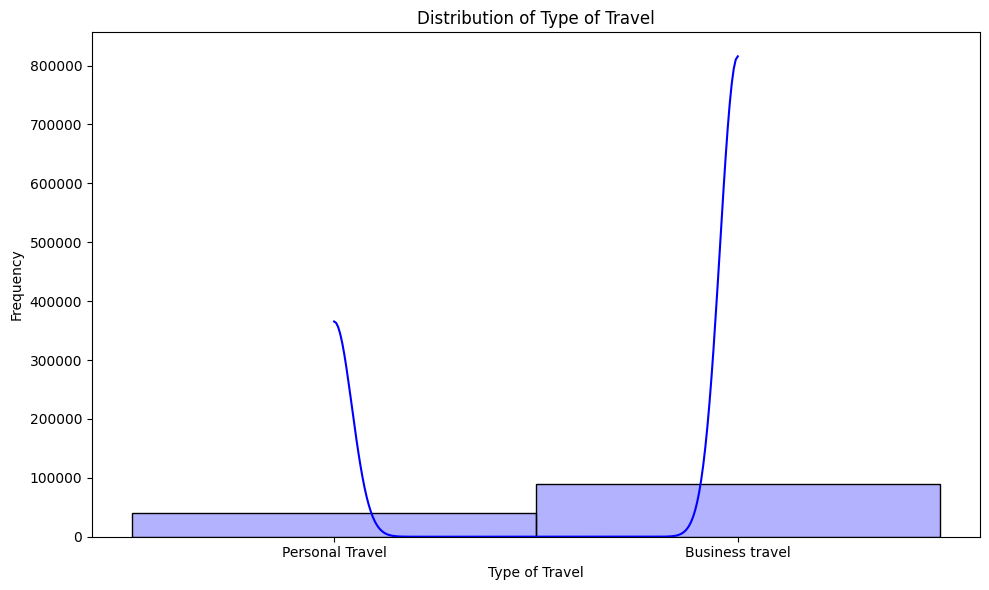

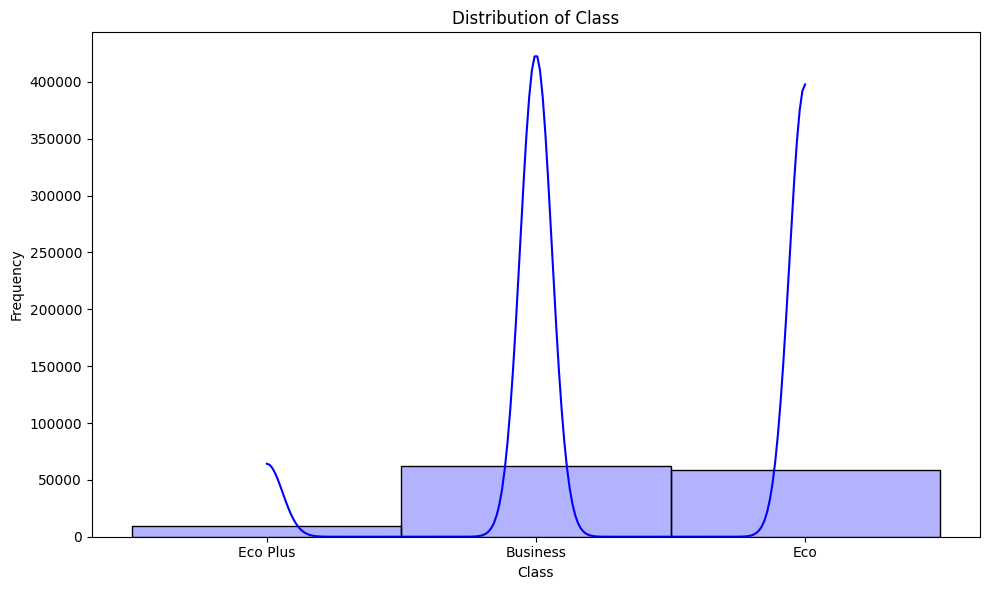

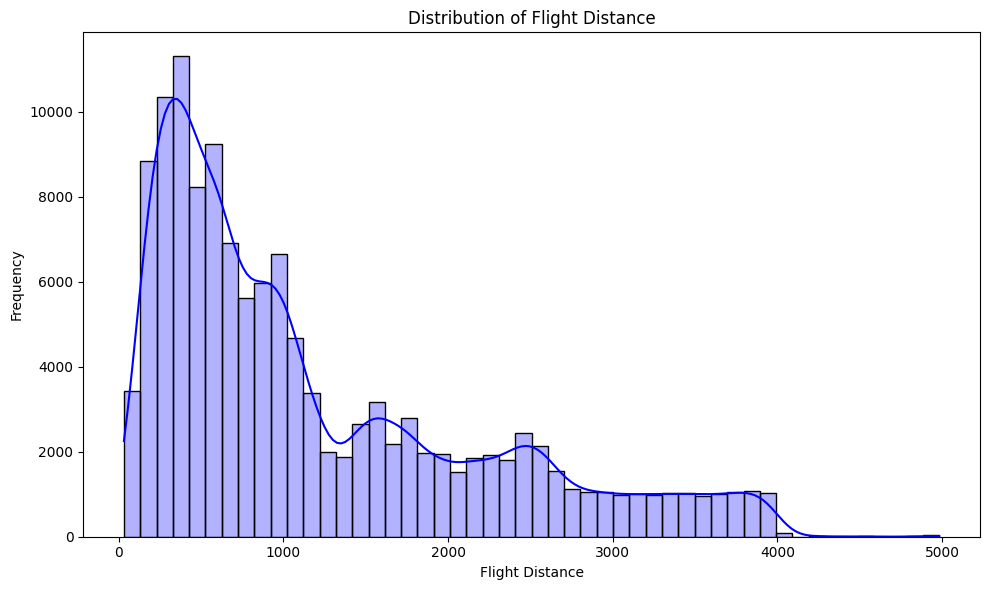

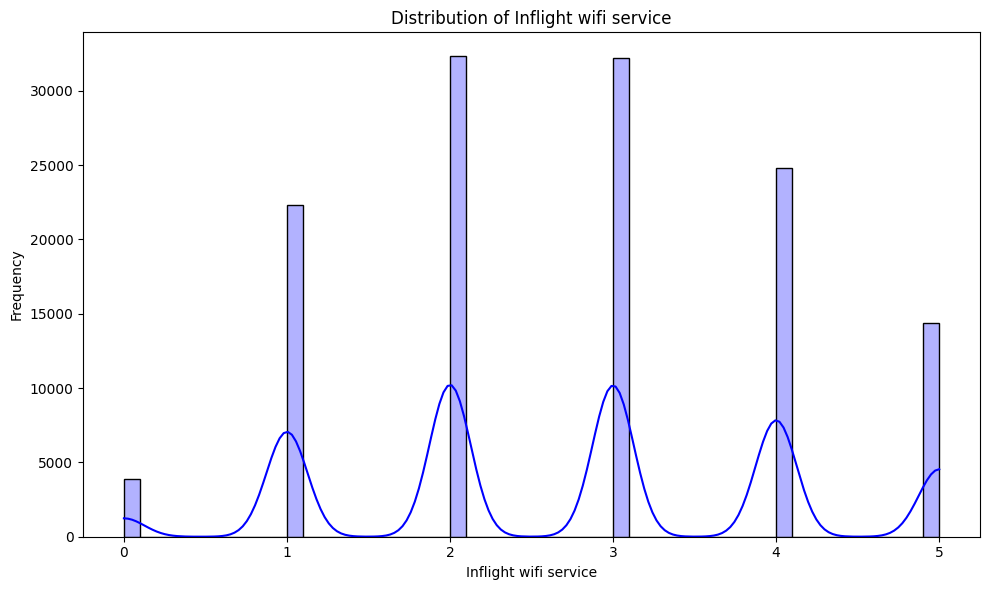

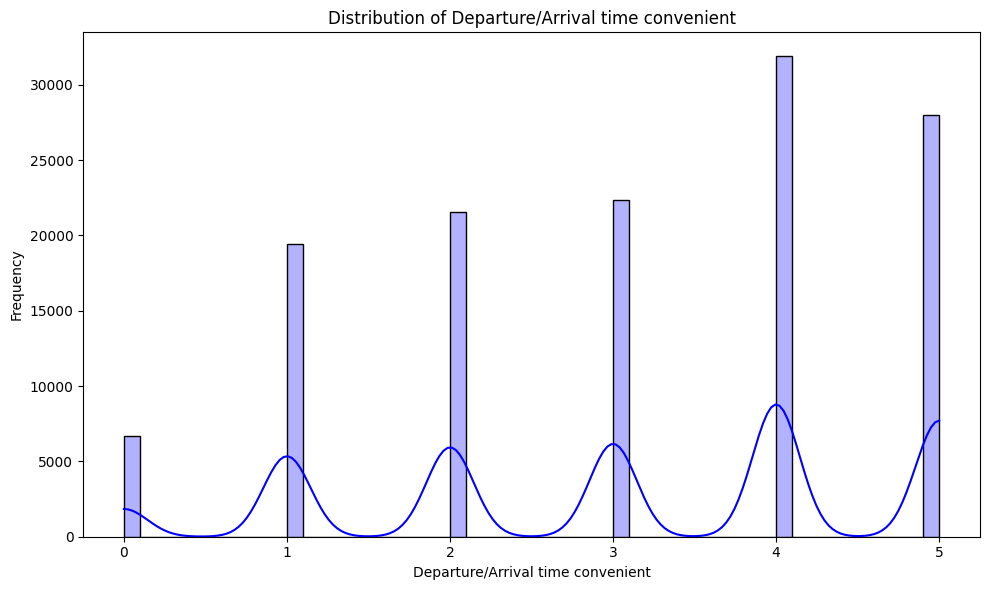

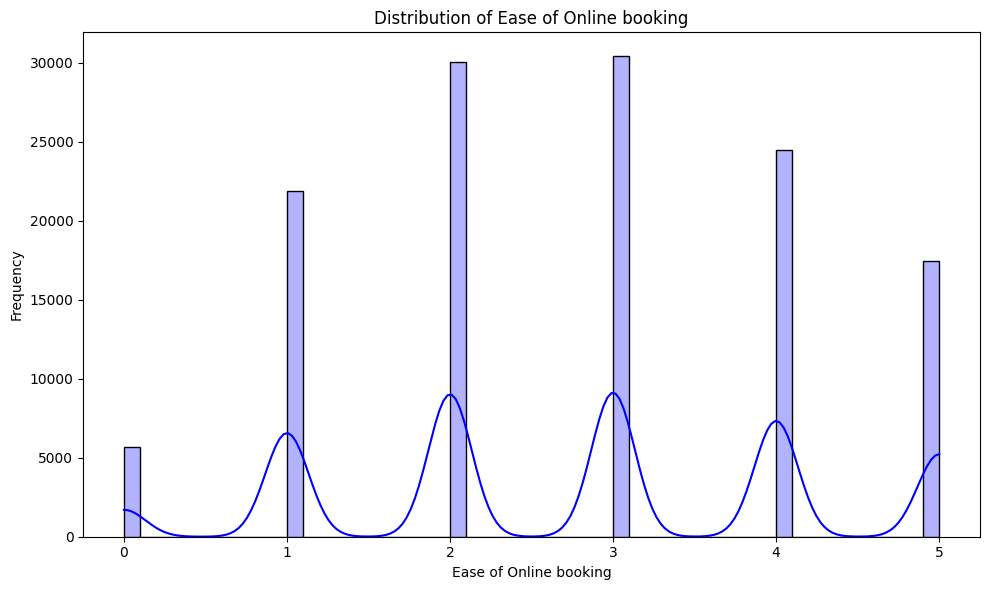

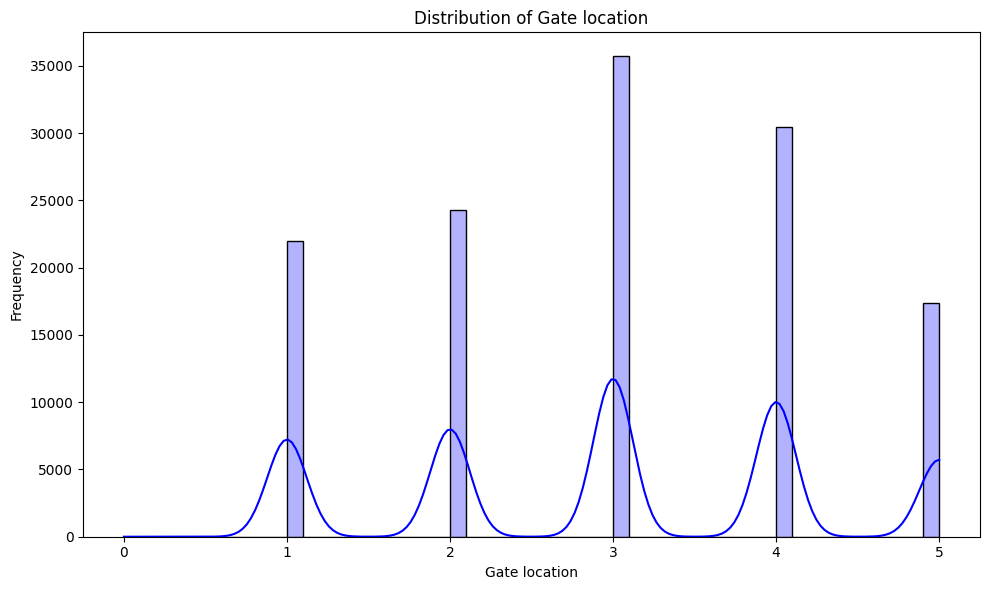

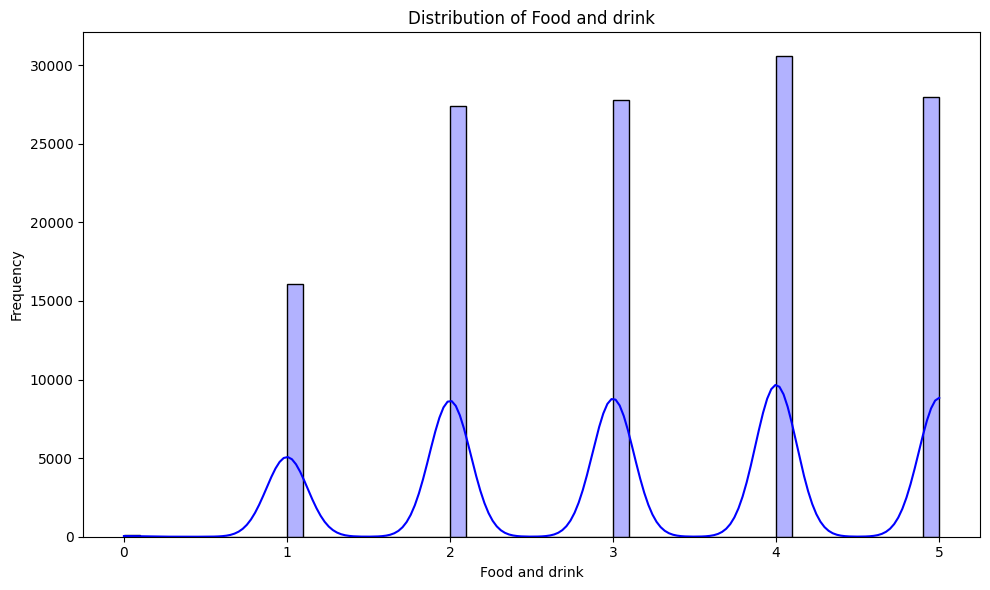

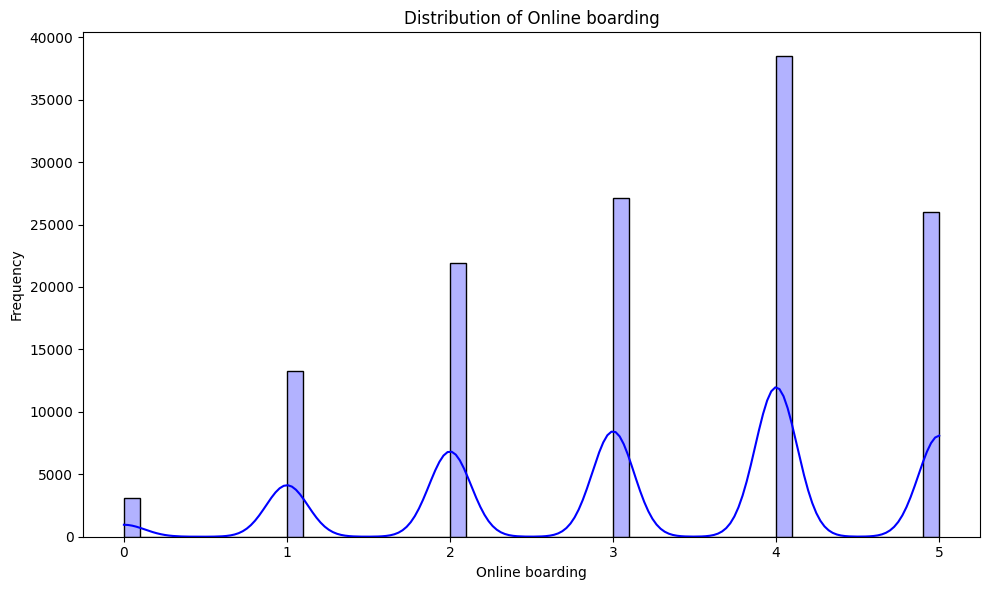

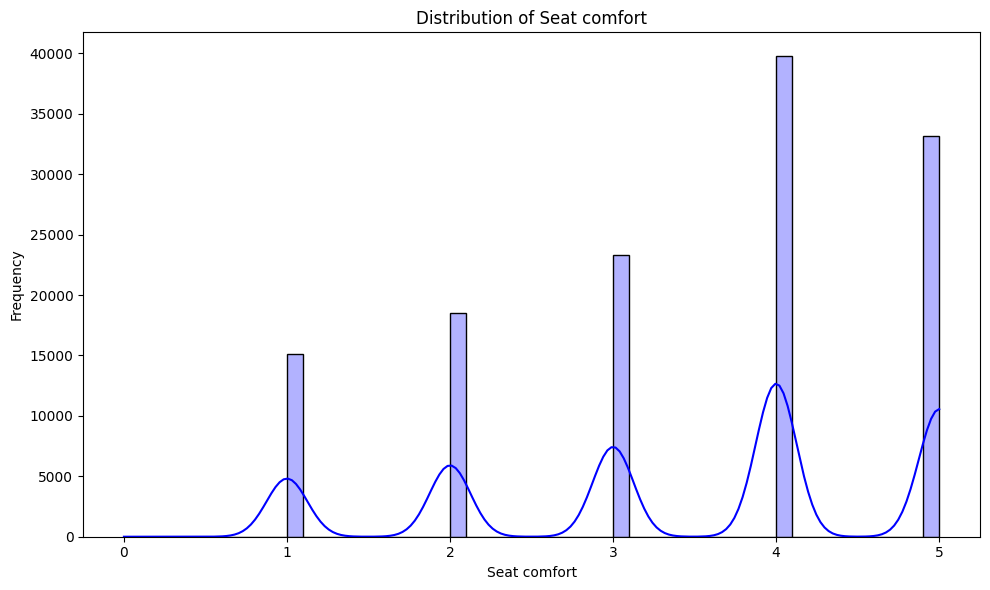

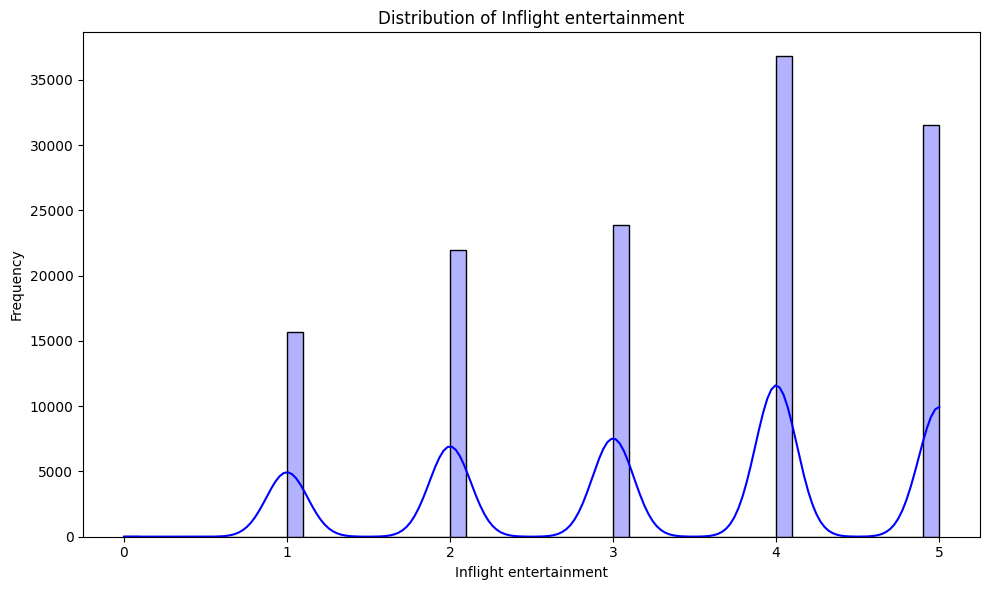

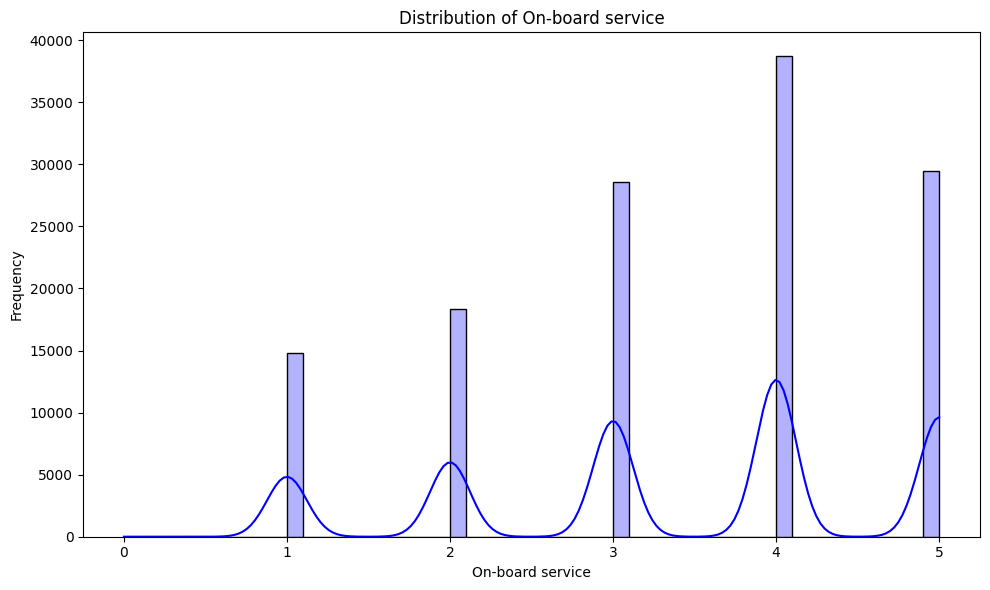

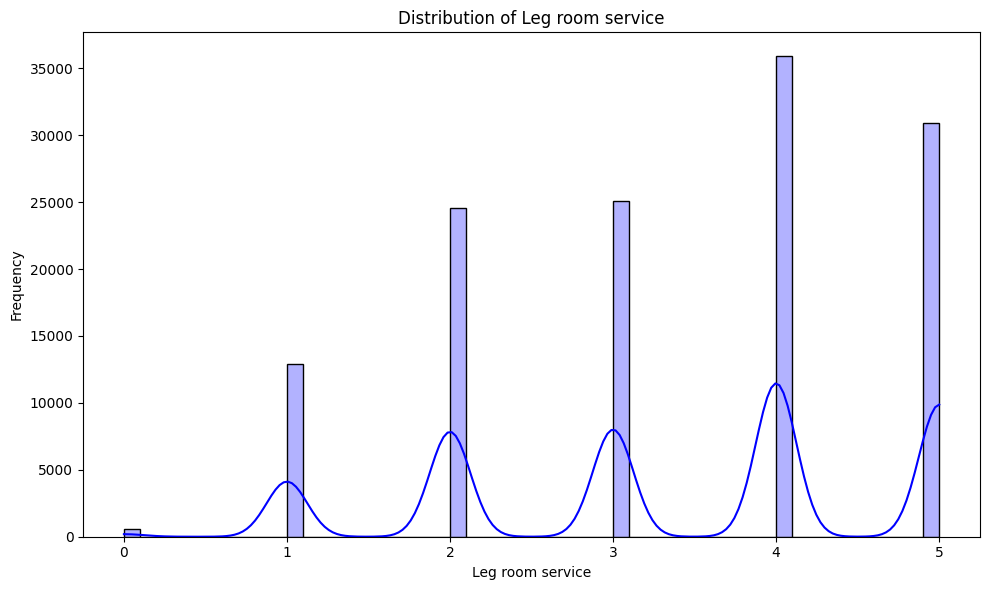

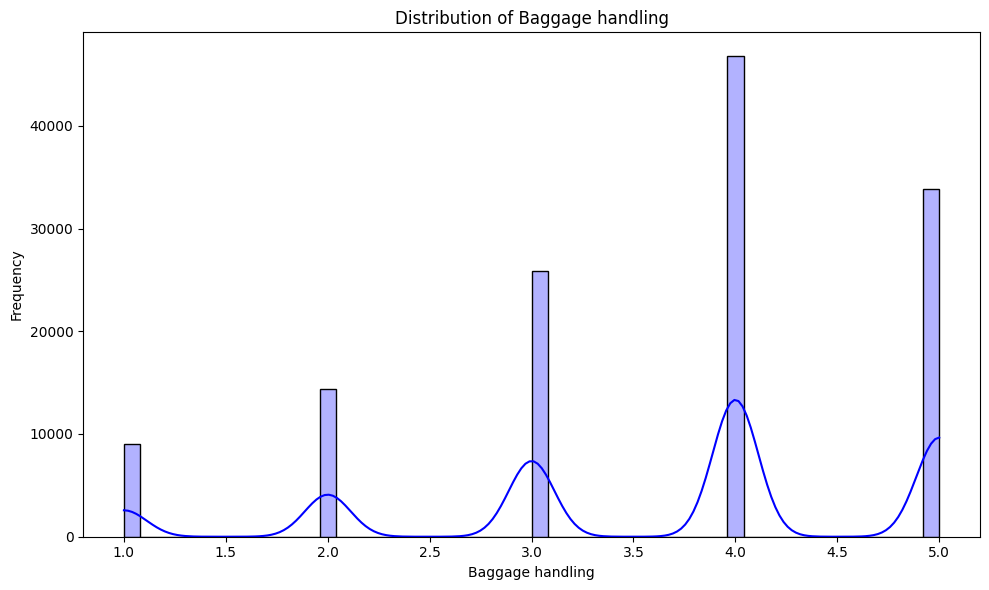

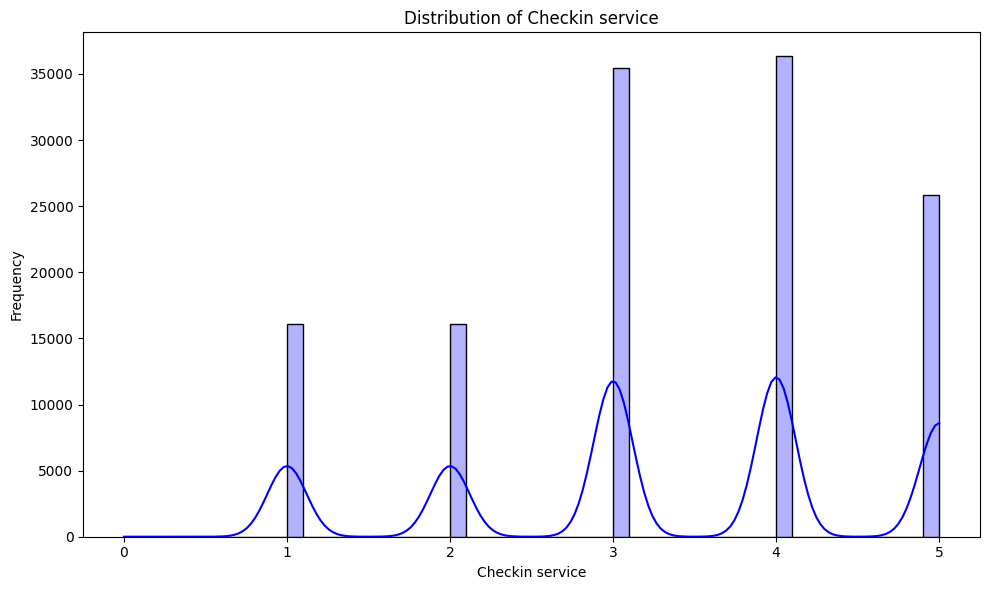

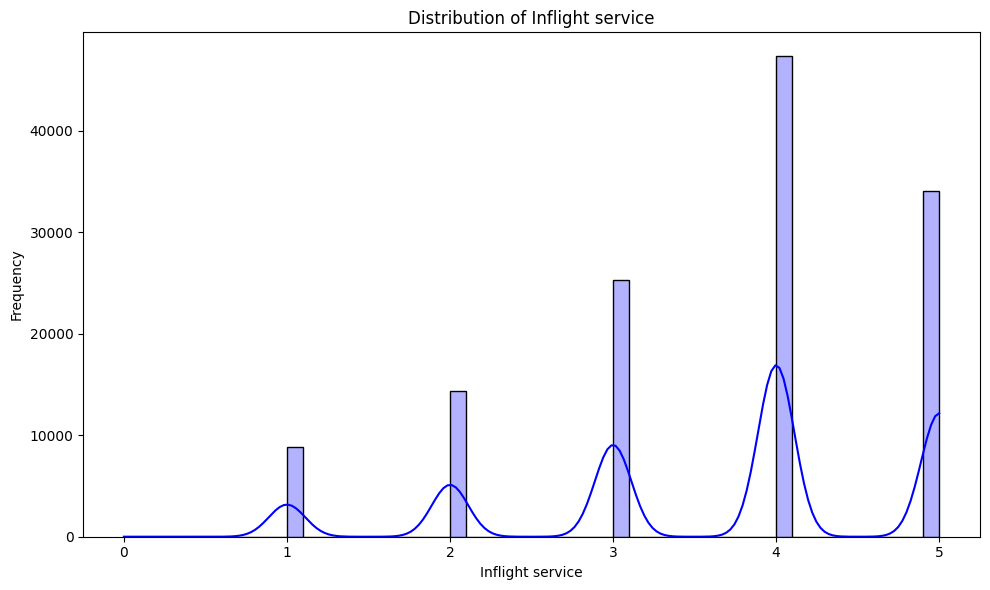

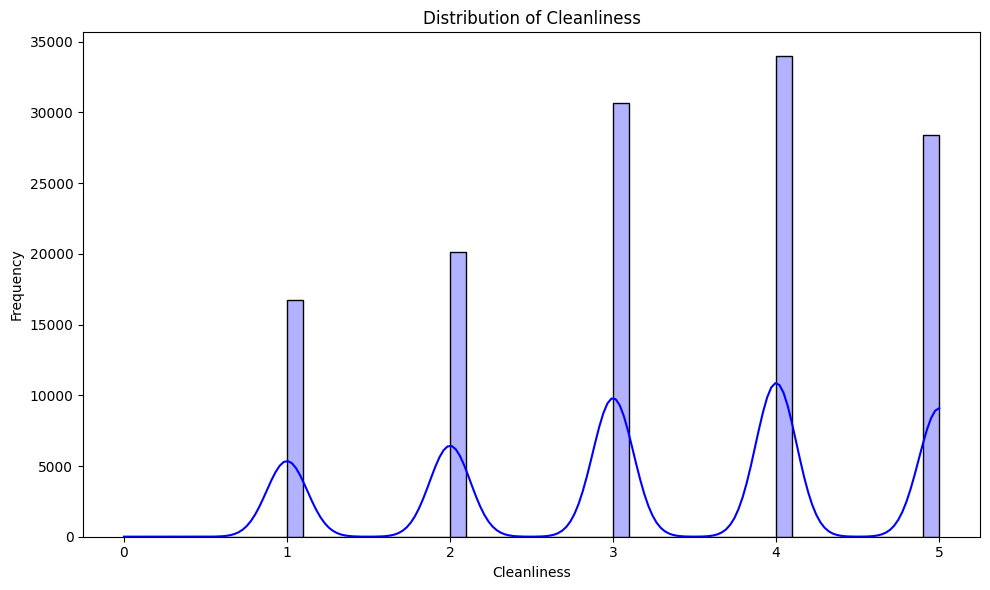

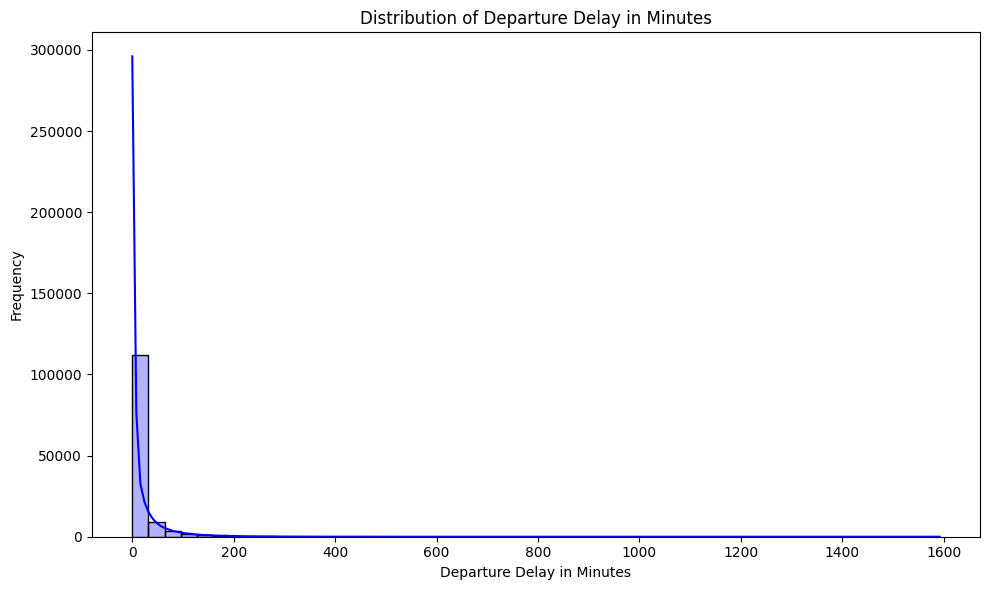

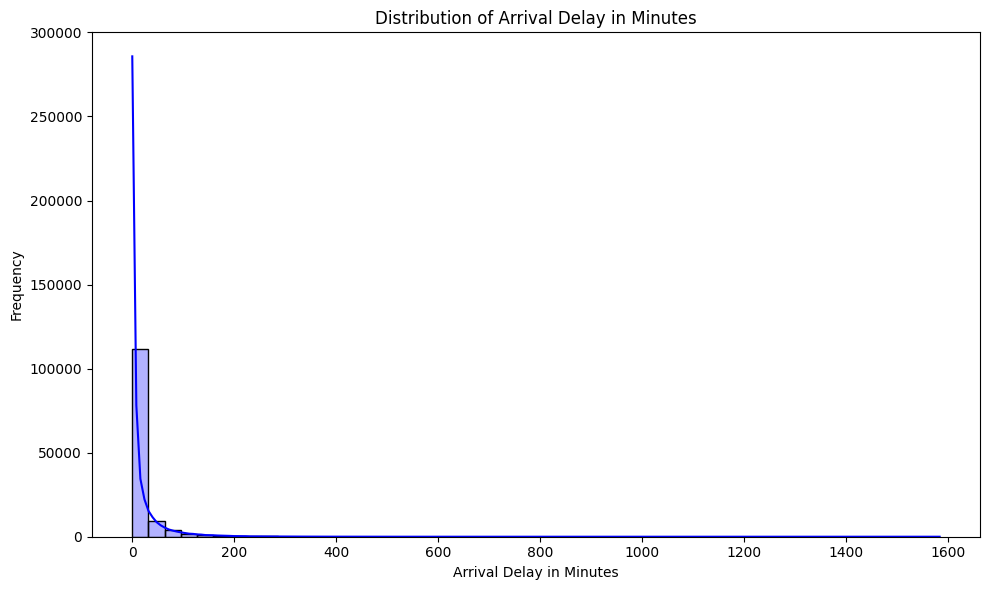

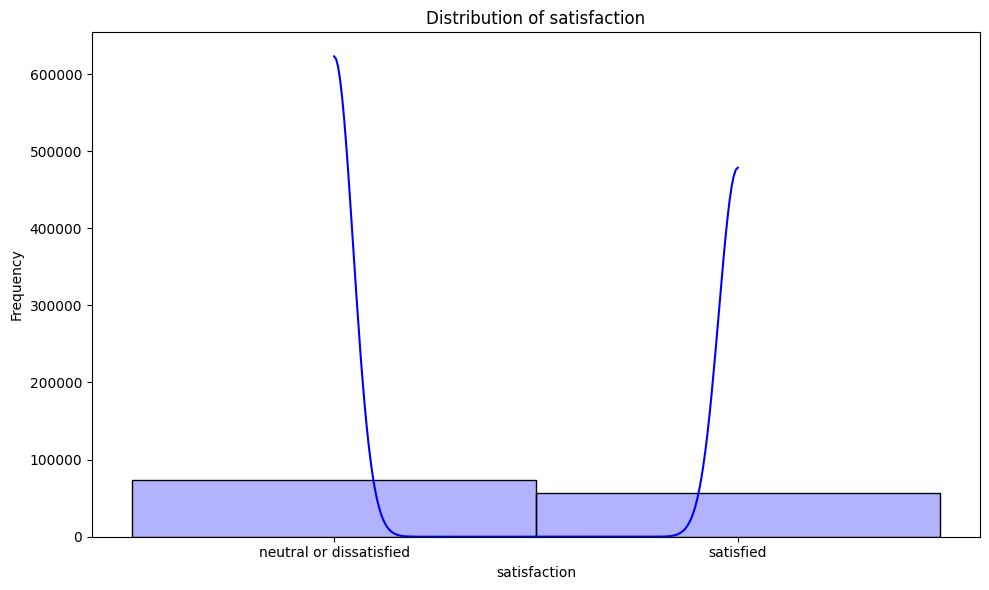

In [17]:
for col in df:
    plt.figure(figsize=(10, 6))  # Set figure size for each plot

    # Plot histogram with KDE
    sns.histplot(df[col], color='b', bins=50, kde=True, alpha=0.3)

    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

    # Show plot for the current column
    plt.show()

In [18]:
"""plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
"""

'plt.subplots(figsize=(20,20))\nsns.heatmap(df.corr(), annot=True)\n'

#### checking balancing

In [19]:
df['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    73452
satisfied                  56428
Name: count, dtype: int64

C:\Users\EL-Bustan\AppData\Local\Temp\ipykernel_12884\2630051899.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='satisfaction', data=df, palette=custom_colors)


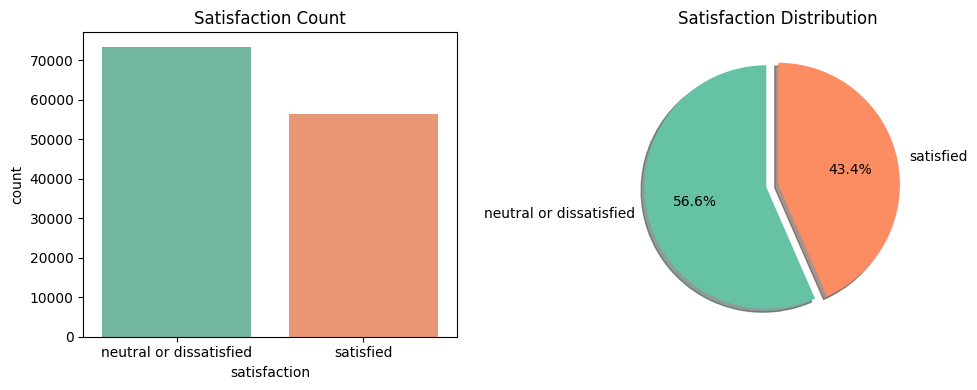

In [20]:

# Custom color palette
custom_colors = ['#66c2a5', '#fc8d62']  
# Attrition Distribution
plt.figure(figsize=(10, 4))

# Count Plot of Satisfaction
plt.subplot(1, 2, 1)
sns.countplot(x='satisfaction', data=df, palette=custom_colors)
plt.title('Satisfaction Count')

# Pie Chart of Satisfaction Distribution
plt.subplot(1, 2, 2)
satisfaction_counts = df['satisfaction'].value_counts()
plt.pie(satisfaction_counts, labels=satisfaction_counts.index, autopct='%1.1f%%',
        startangle=90, explode=(0.1, 0), shadow=True, colors=custom_colors)
plt.title('Satisfaction Distribution')

plt.tight_layout()
plt.show()

### Visualise Data and its Effect on Target (Satification)

C:\Users\EL-Bustan\AppData\Local\Temp\ipykernel_12884\364561604.py:11: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x=feature, hue=feature, data=df, palette=custom_colors, legend=False)
C:\Users\EL-Bustan\AppData\Local\Temp\ipykernel_12884\364561604.py:17: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x=feature, hue='satisfaction', data=df, palette=custom_colors)  # 'satisfaction' is your target column


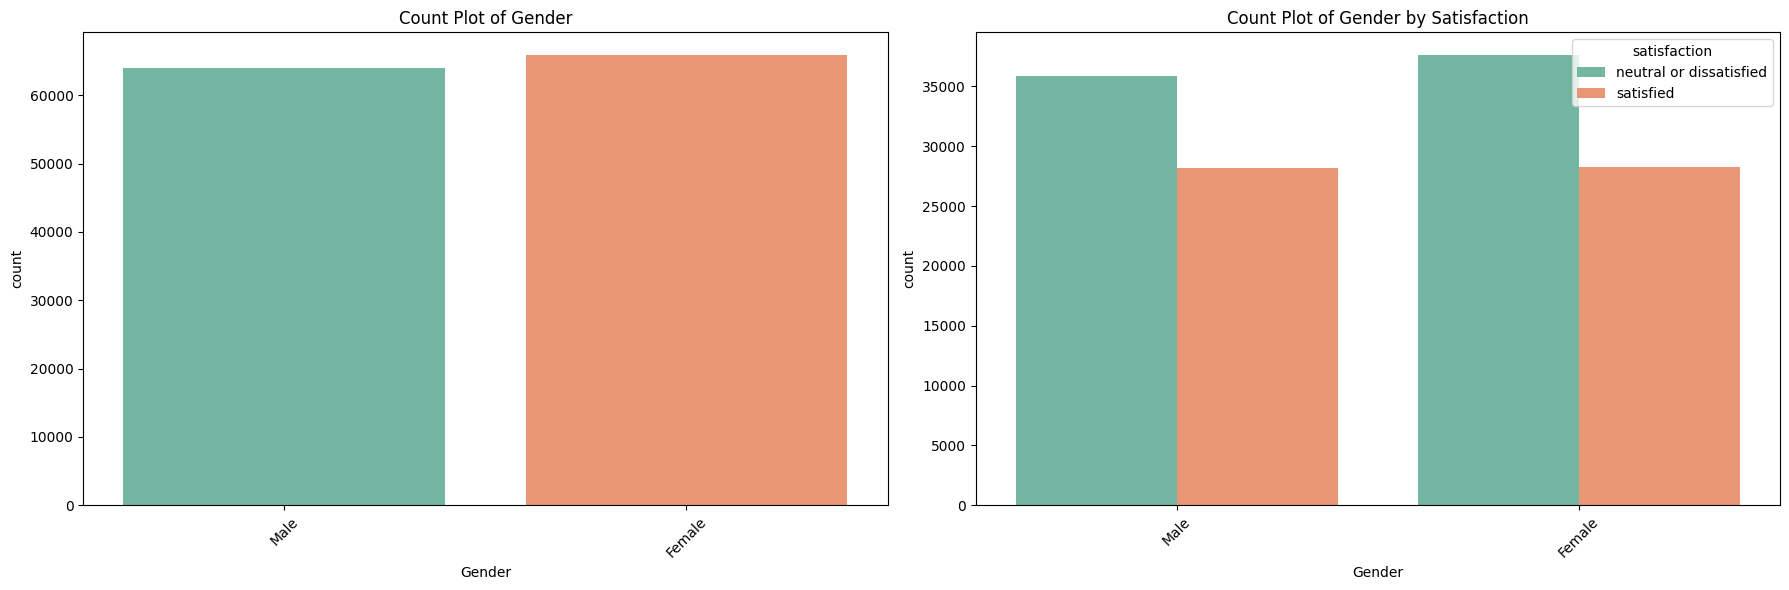

C:\Users\EL-Bustan\AppData\Local\Temp\ipykernel_12884\364561604.py:11: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x=feature, hue=feature, data=df, palette=custom_colors, legend=False)
C:\Users\EL-Bustan\AppData\Local\Temp\ipykernel_12884\364561604.py:17: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x=feature, hue='satisfaction', data=df, palette=custom_colors)  # 'satisfaction' is your target column


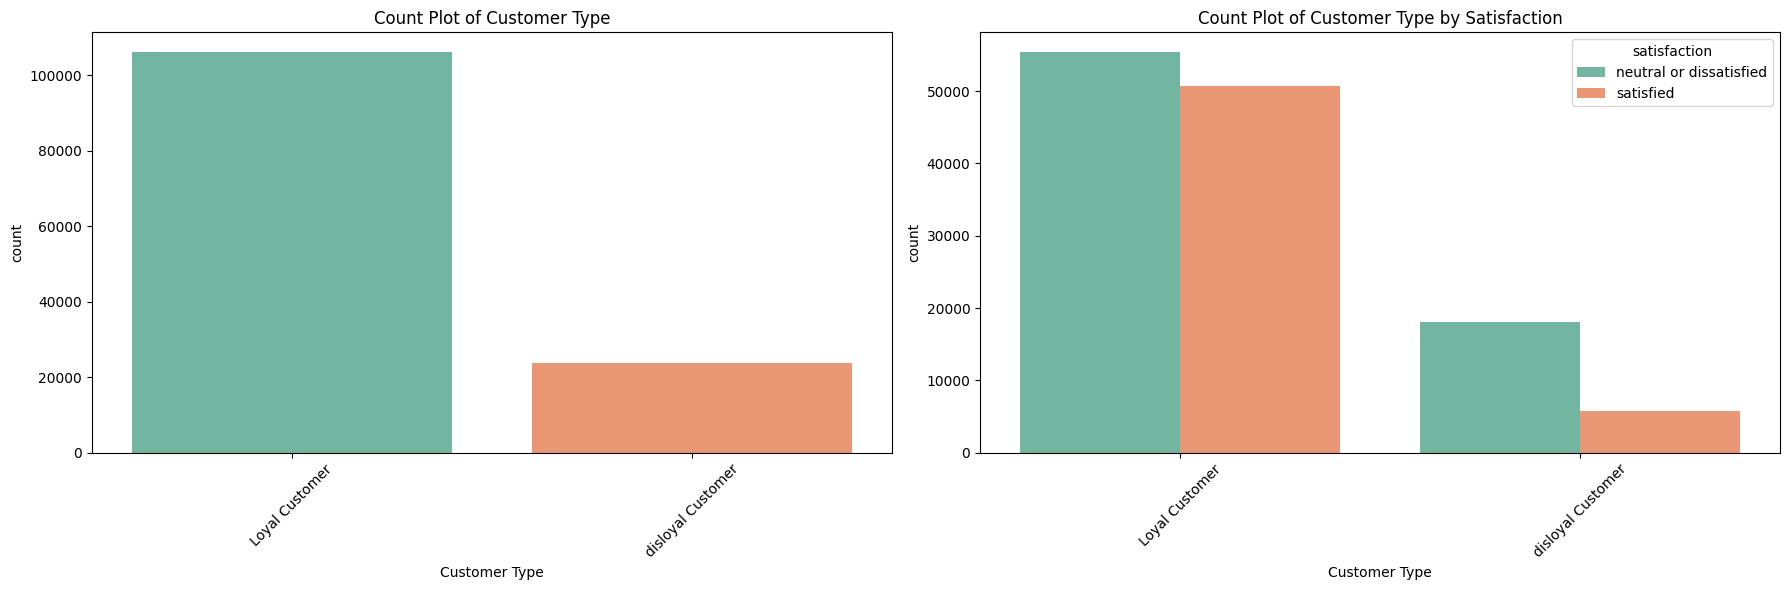

C:\Users\EL-Bustan\AppData\Local\Temp\ipykernel_12884\364561604.py:11: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x=feature, hue=feature, data=df, palette=custom_colors, legend=False)
C:\Users\EL-Bustan\AppData\Local\Temp\ipykernel_12884\364561604.py:17: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x=feature, hue='satisfaction', data=df, palette=custom_colors)  # 'satisfaction' is your target column


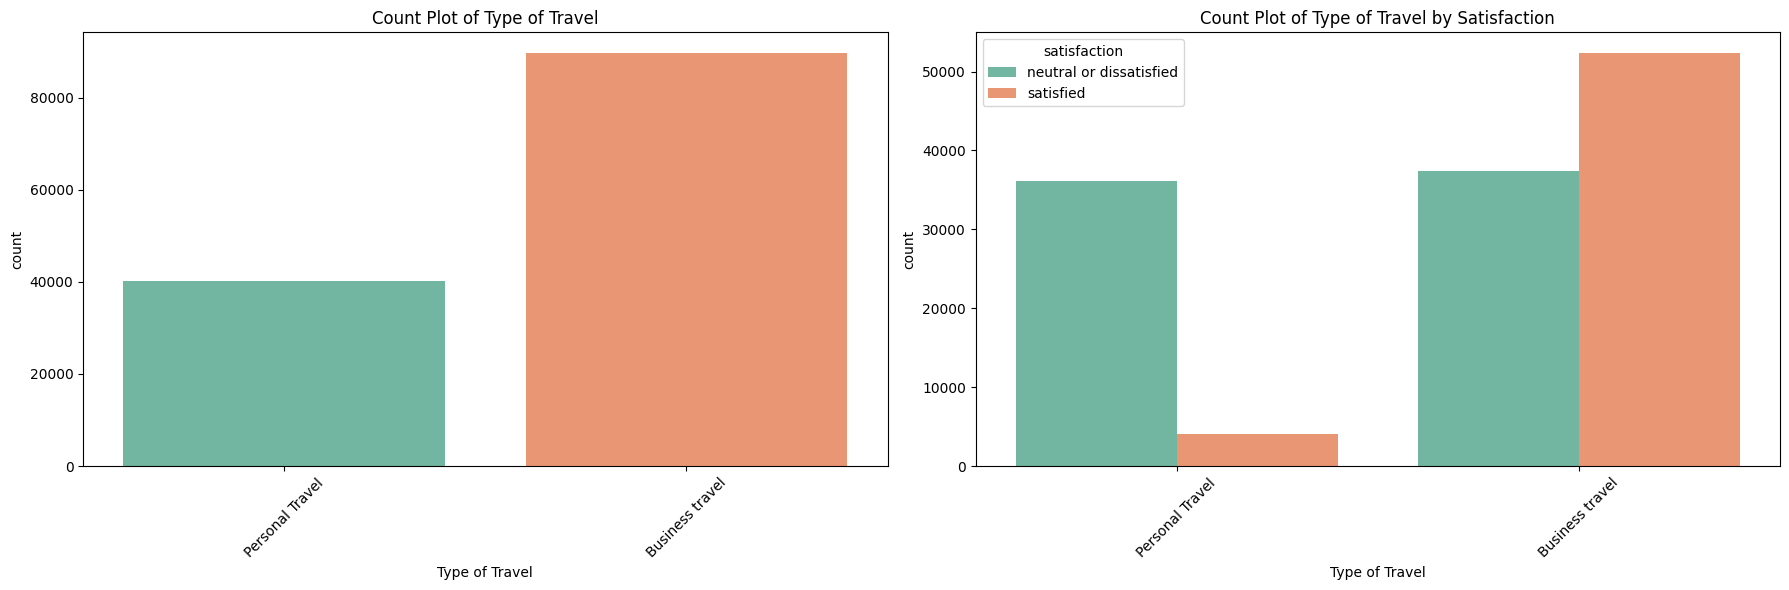

C:\Users\EL-Bustan\AppData\Local\Temp\ipykernel_12884\364561604.py:11: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.countplot(x=feature, hue=feature, data=df, palette=custom_colors, legend=False)
C:\Users\EL-Bustan\AppData\Local\Temp\ipykernel_12884\364561604.py:17: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x=feature, hue='satisfaction', data=df, palette=custom_colors)  # 'satisfaction' is your target column


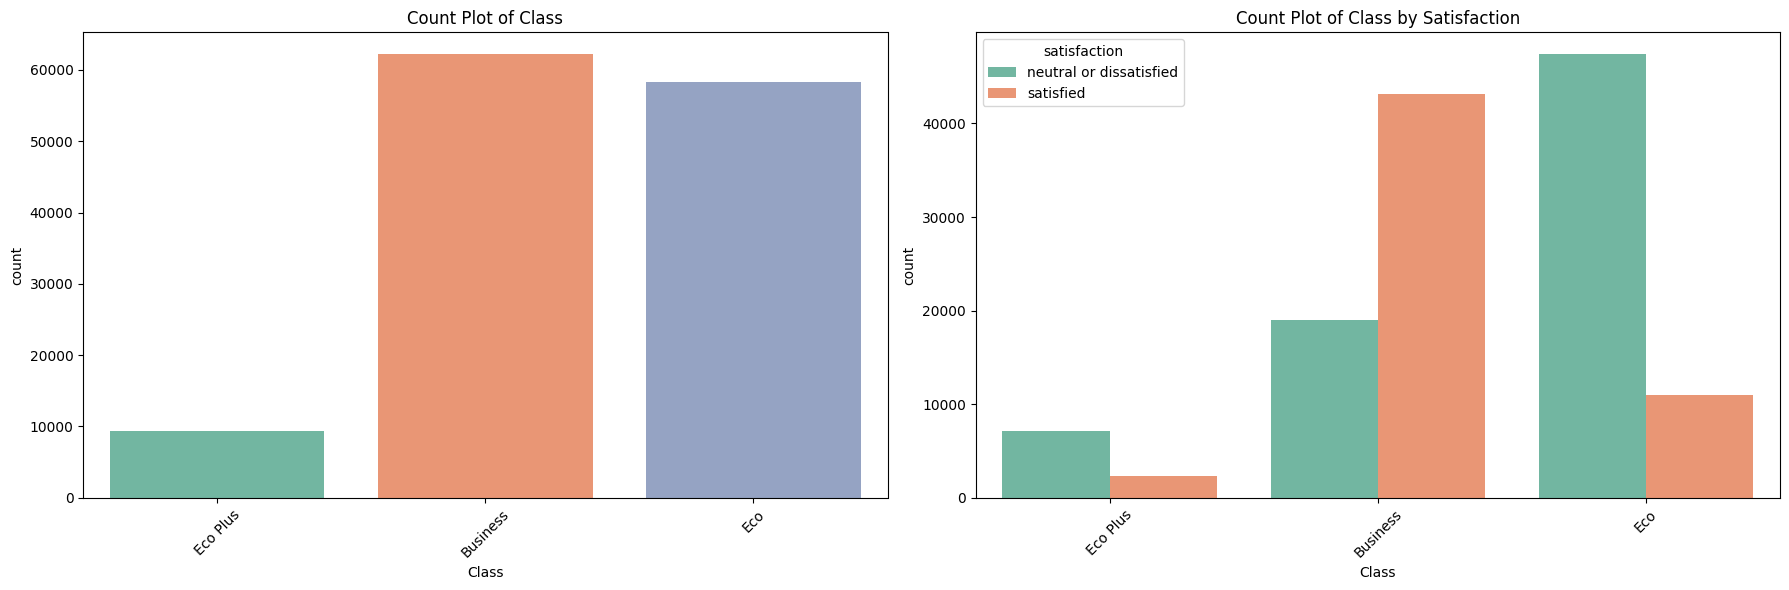

C:\Users\EL-Bustan\AppData\Local\Temp\ipykernel_12884\364561604.py:17: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x=feature, hue='satisfaction', data=df, palette=custom_colors)  # 'satisfaction' is your target column


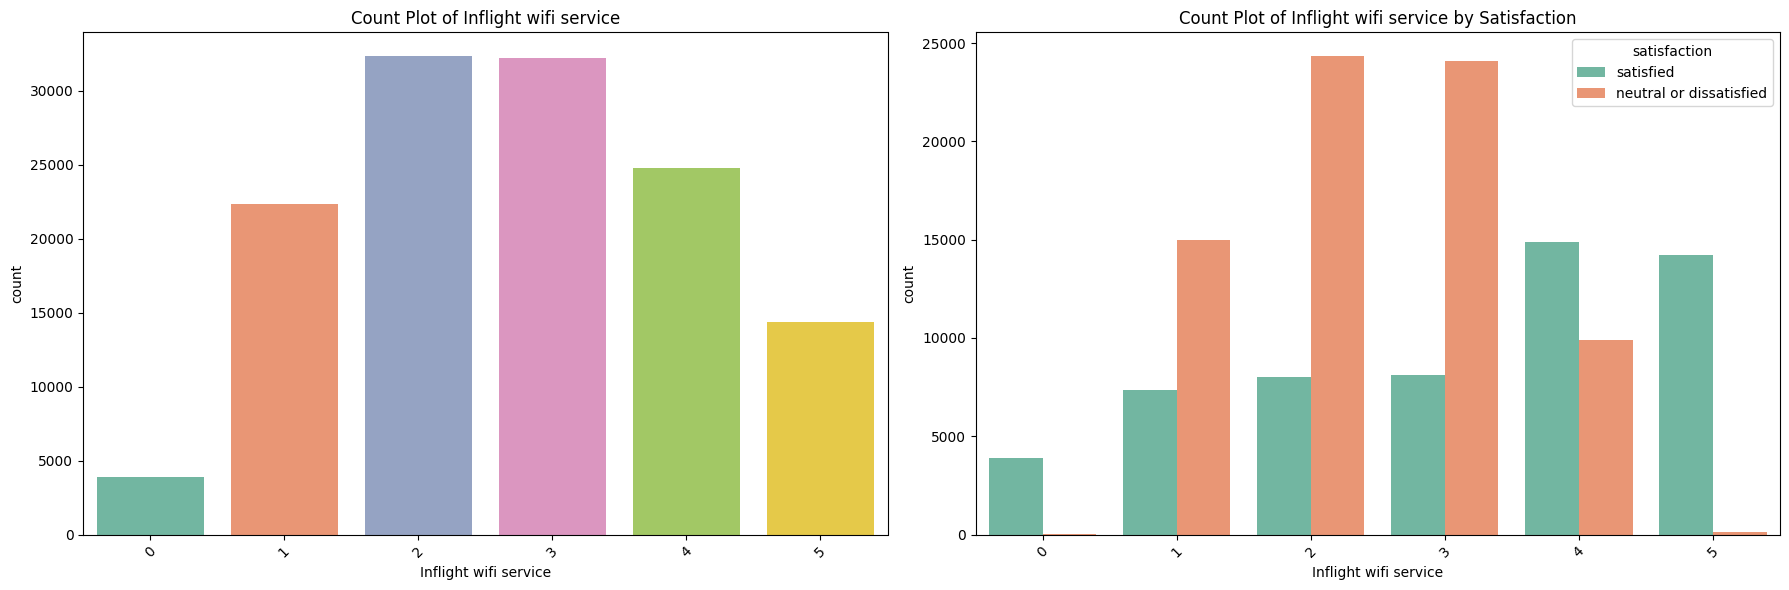

C:\Users\EL-Bustan\AppData\Local\Temp\ipykernel_12884\364561604.py:17: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x=feature, hue='satisfaction', data=df, palette=custom_colors)  # 'satisfaction' is your target column


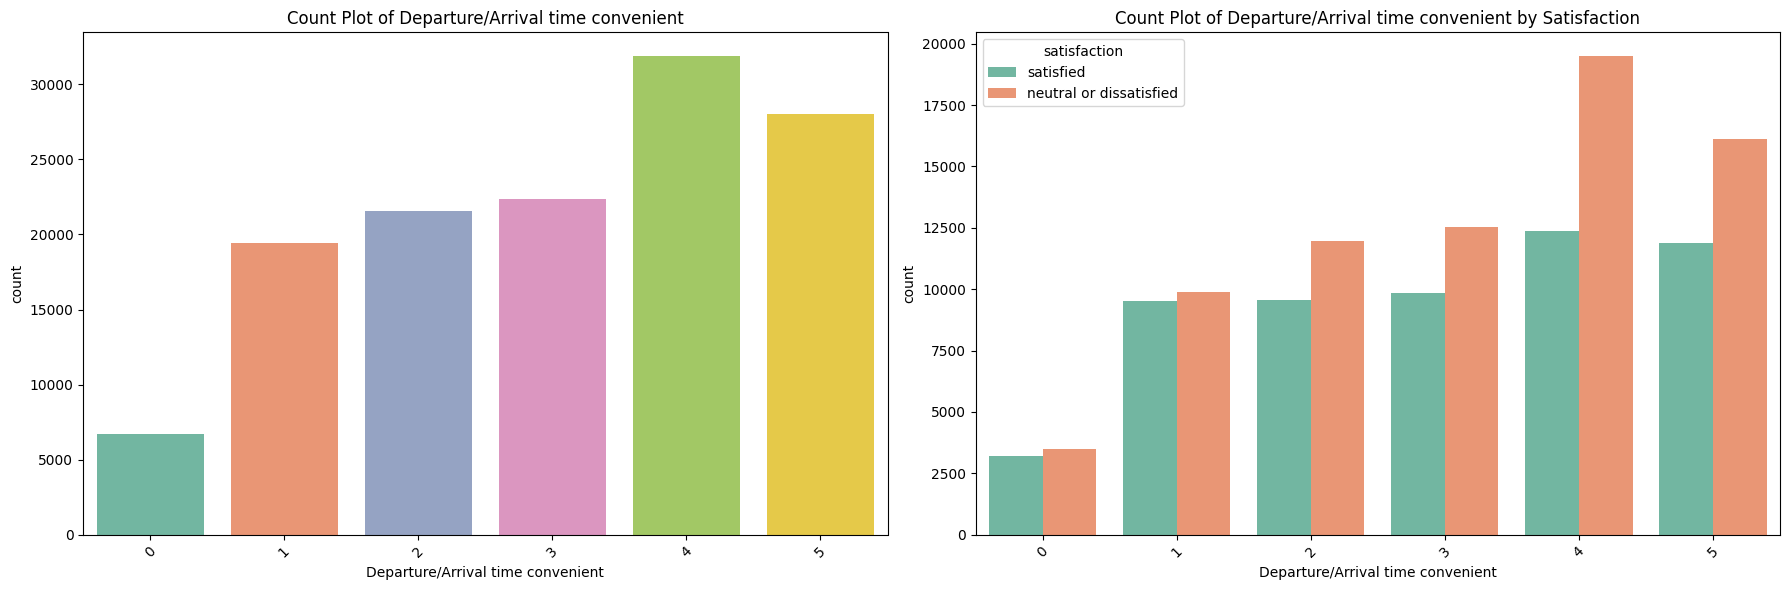

C:\Users\EL-Bustan\AppData\Local\Temp\ipykernel_12884\364561604.py:17: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x=feature, hue='satisfaction', data=df, palette=custom_colors)  # 'satisfaction' is your target column


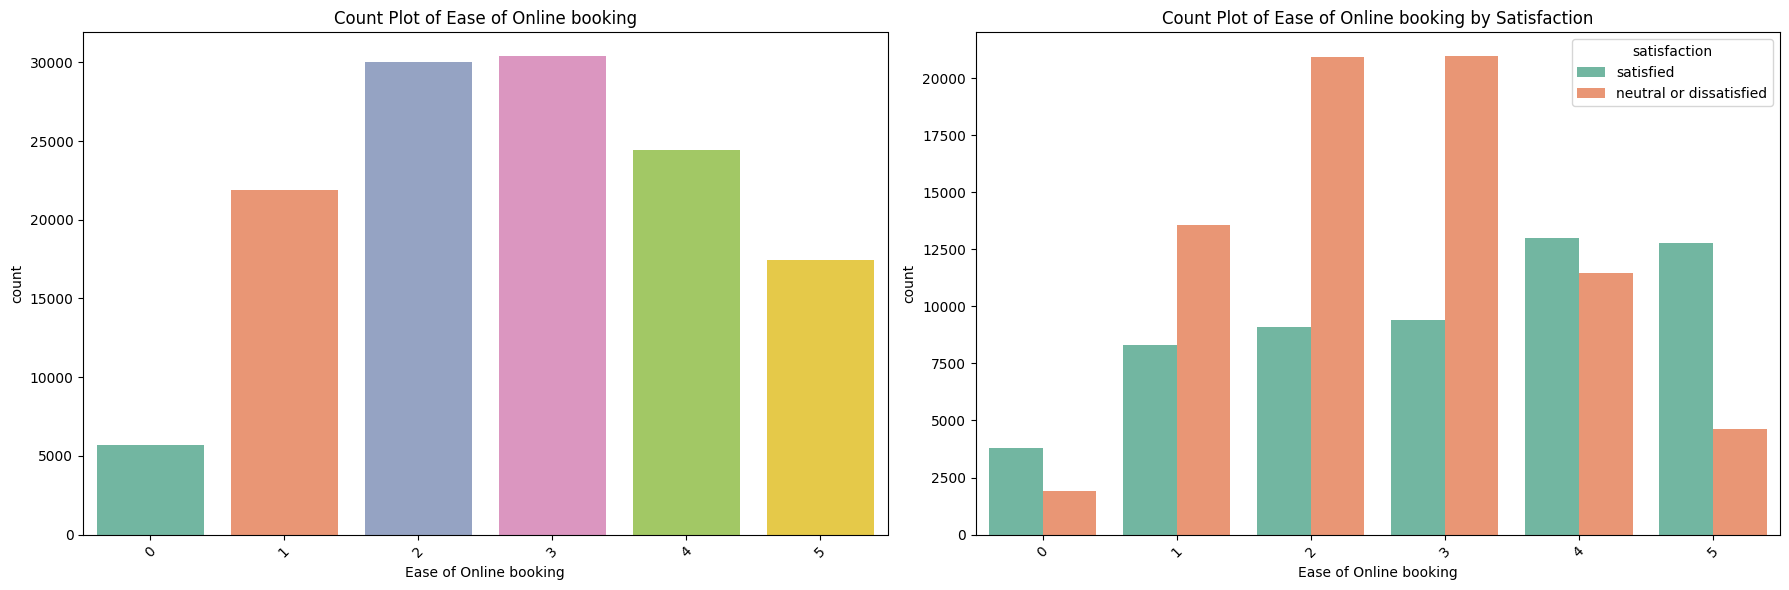

C:\Users\EL-Bustan\AppData\Local\Temp\ipykernel_12884\364561604.py:17: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x=feature, hue='satisfaction', data=df, palette=custom_colors)  # 'satisfaction' is your target column


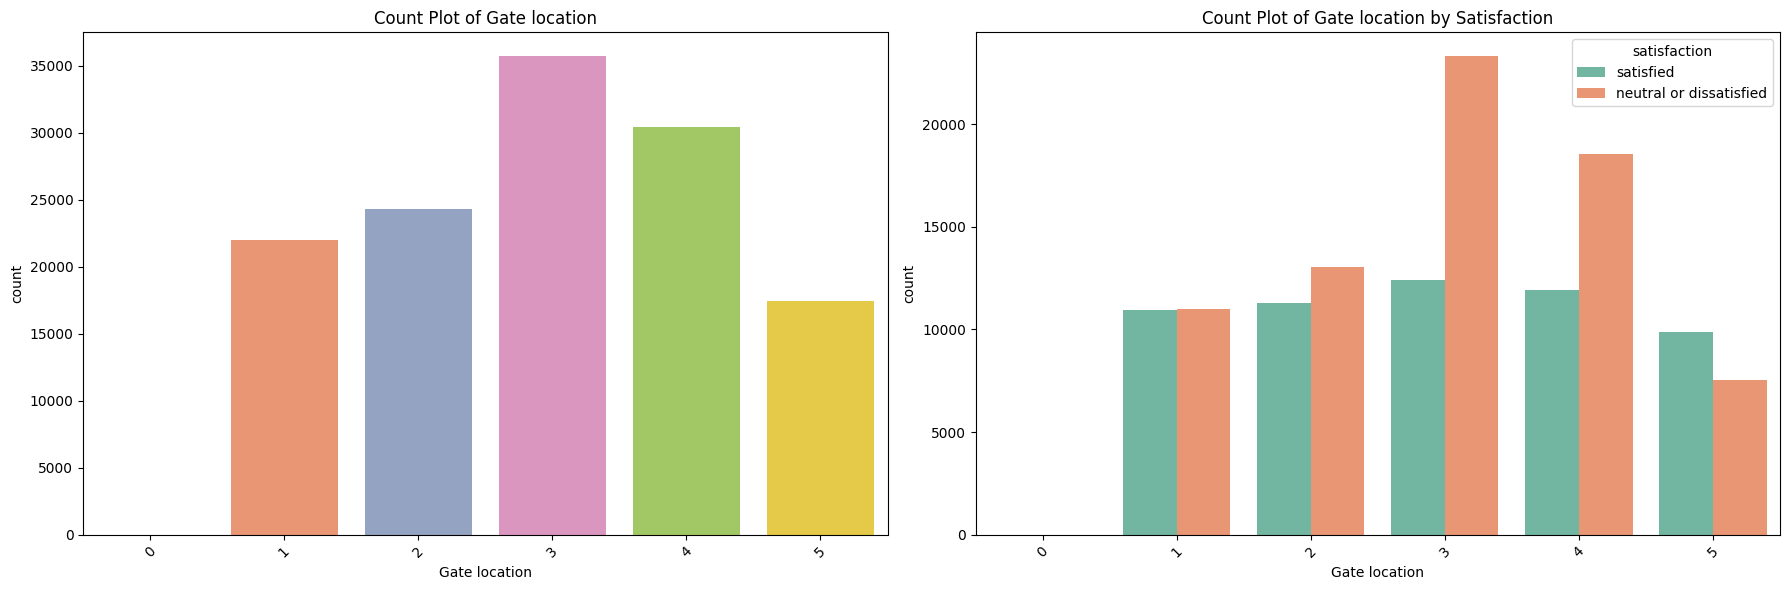

C:\Users\EL-Bustan\AppData\Local\Temp\ipykernel_12884\364561604.py:17: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x=feature, hue='satisfaction', data=df, palette=custom_colors)  # 'satisfaction' is your target column


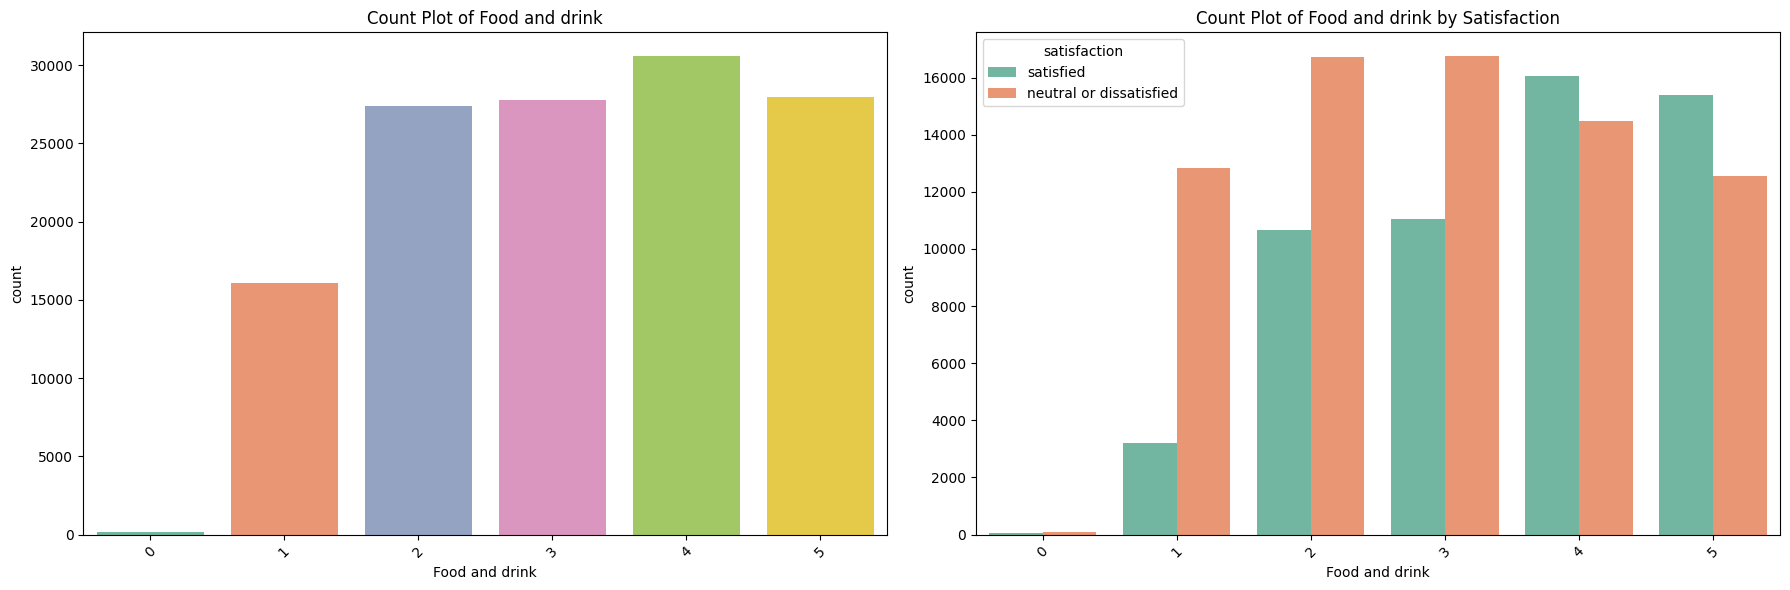

C:\Users\EL-Bustan\AppData\Local\Temp\ipykernel_12884\364561604.py:17: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x=feature, hue='satisfaction', data=df, palette=custom_colors)  # 'satisfaction' is your target column


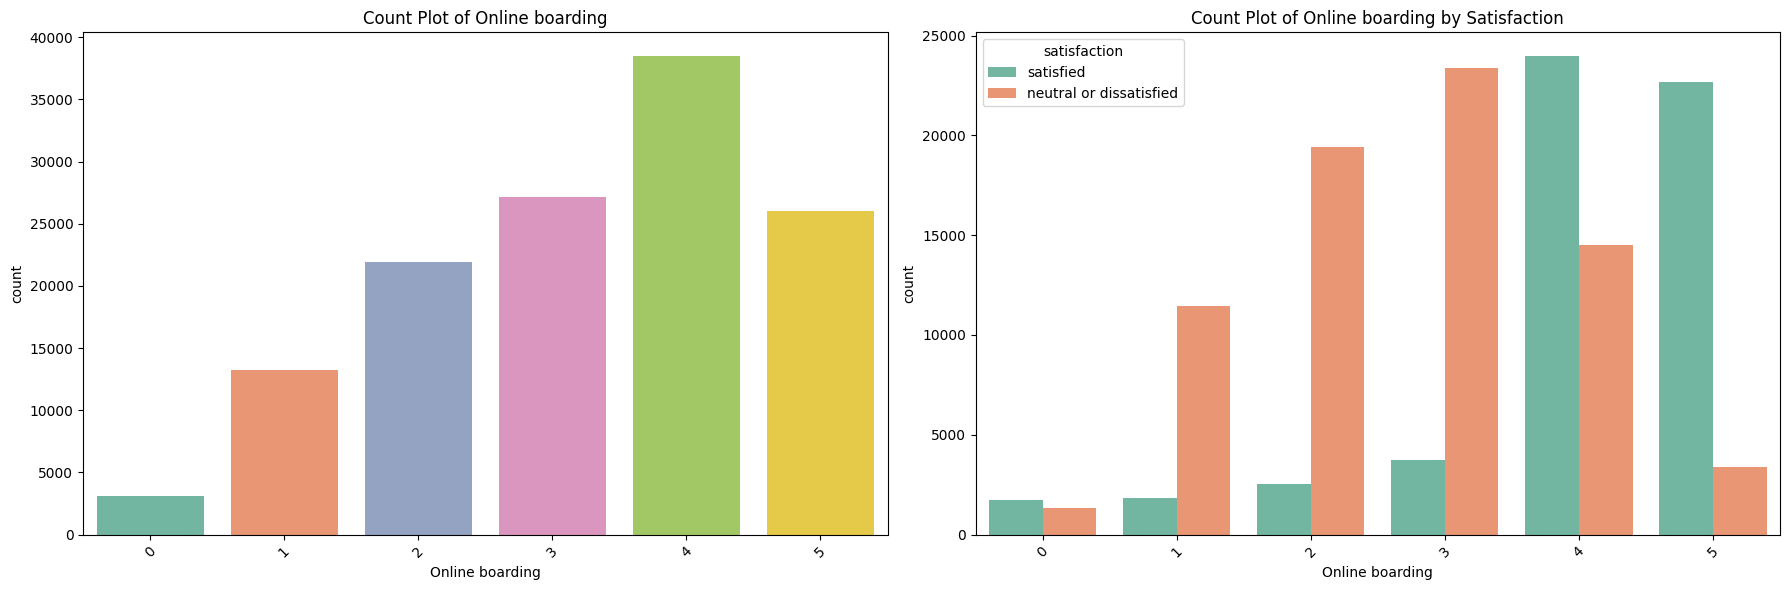

C:\Users\EL-Bustan\AppData\Local\Temp\ipykernel_12884\364561604.py:17: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x=feature, hue='satisfaction', data=df, palette=custom_colors)  # 'satisfaction' is your target column


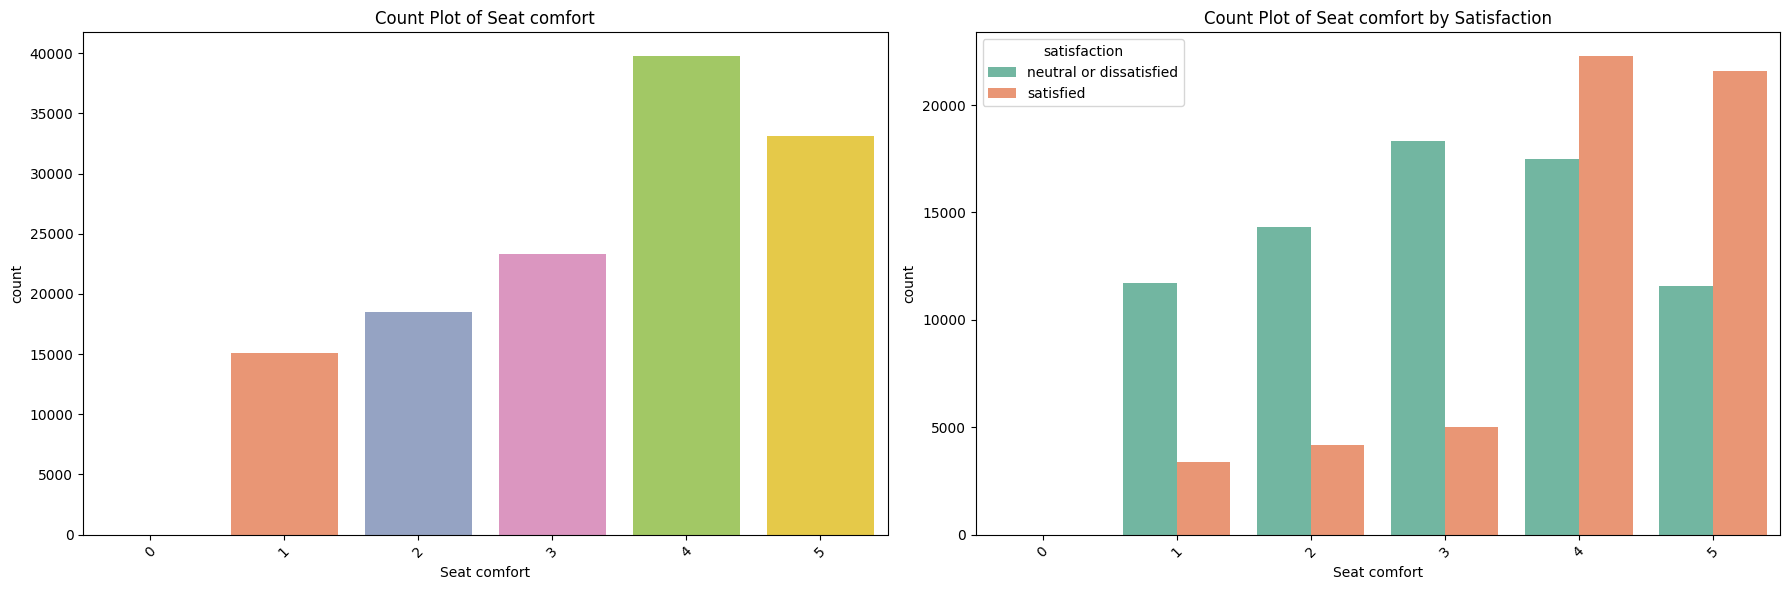

C:\Users\EL-Bustan\AppData\Local\Temp\ipykernel_12884\364561604.py:17: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x=feature, hue='satisfaction', data=df, palette=custom_colors)  # 'satisfaction' is your target column


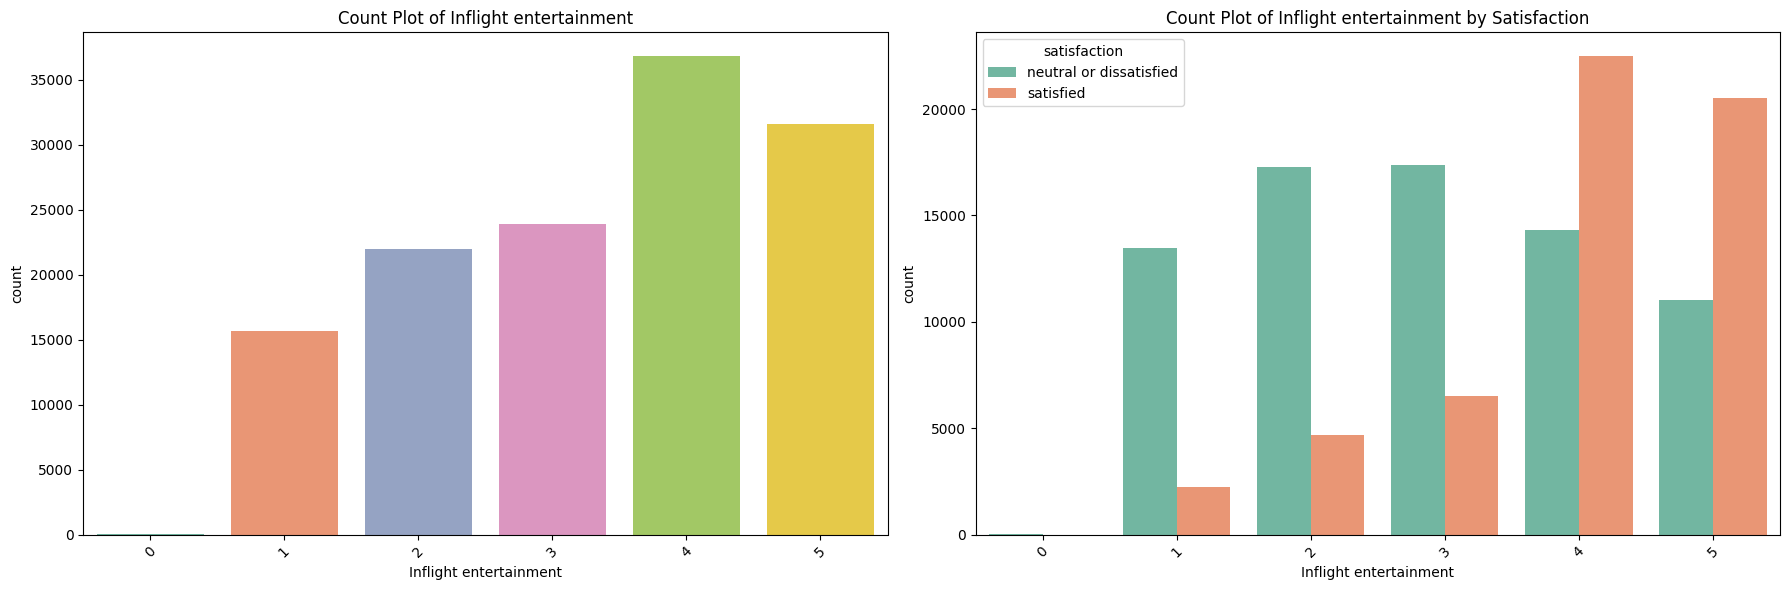

C:\Users\EL-Bustan\AppData\Local\Temp\ipykernel_12884\364561604.py:17: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x=feature, hue='satisfaction', data=df, palette=custom_colors)  # 'satisfaction' is your target column


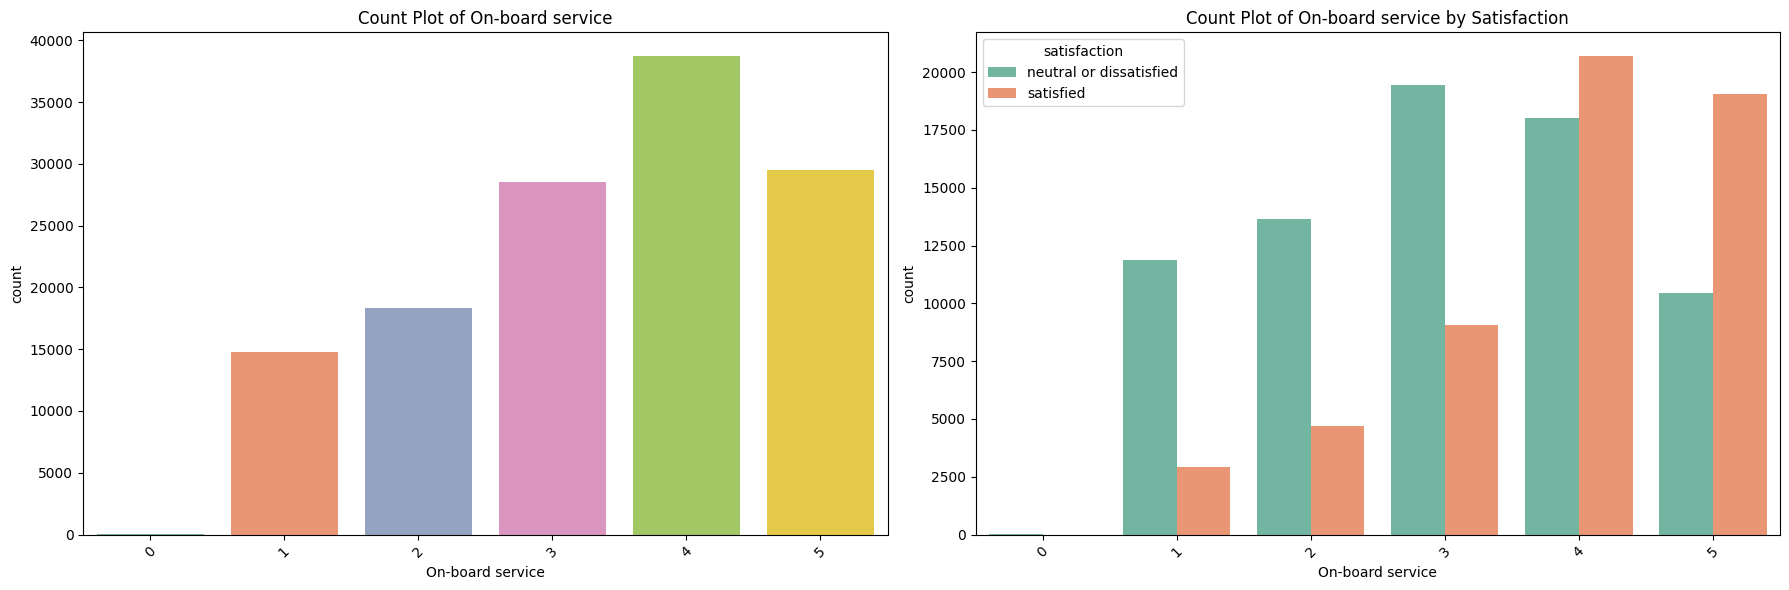

C:\Users\EL-Bustan\AppData\Local\Temp\ipykernel_12884\364561604.py:17: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x=feature, hue='satisfaction', data=df, palette=custom_colors)  # 'satisfaction' is your target column


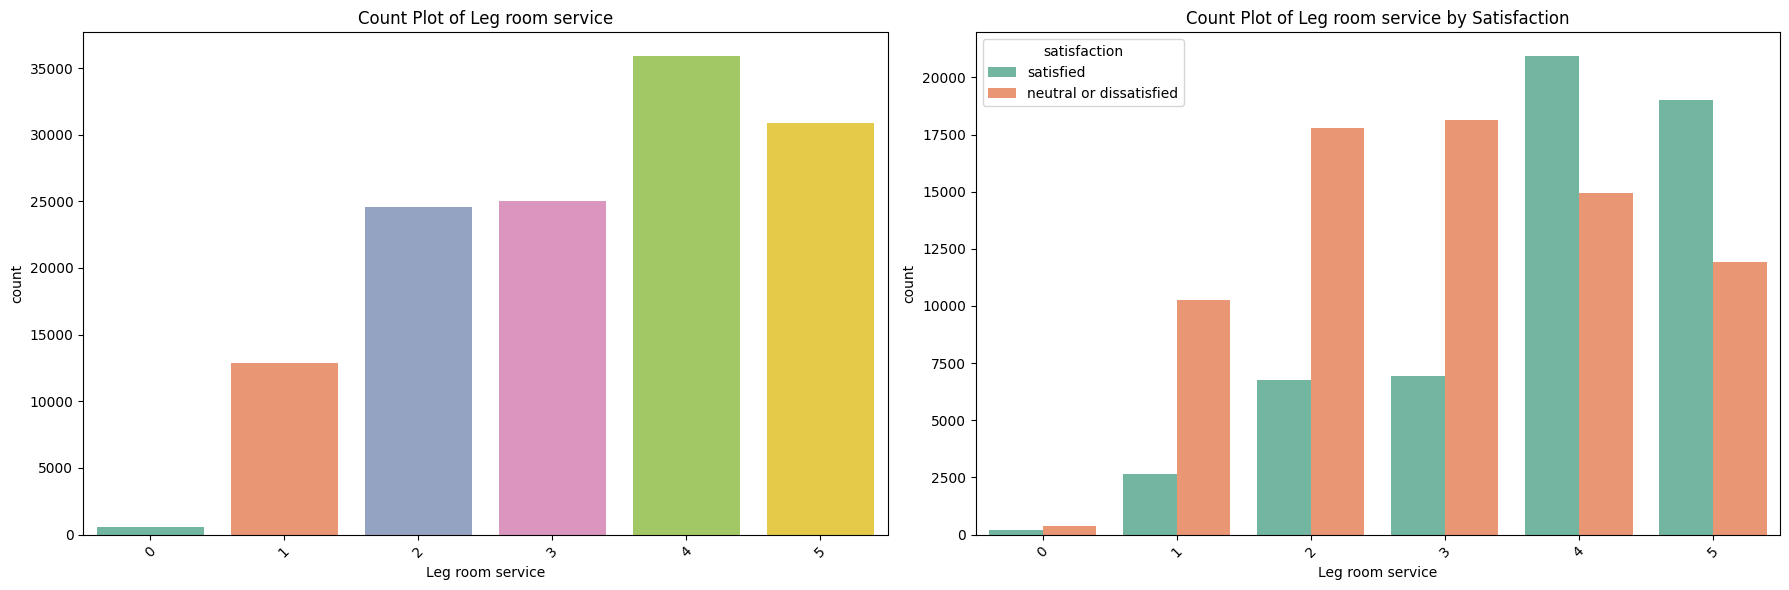

C:\Users\EL-Bustan\AppData\Local\Temp\ipykernel_12884\364561604.py:11: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.countplot(x=feature, hue=feature, data=df, palette=custom_colors, legend=False)
C:\Users\EL-Bustan\AppData\Local\Temp\ipykernel_12884\364561604.py:17: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x=feature, hue='satisfaction', data=df, palette=custom_colors)  # 'satisfaction' is your target column


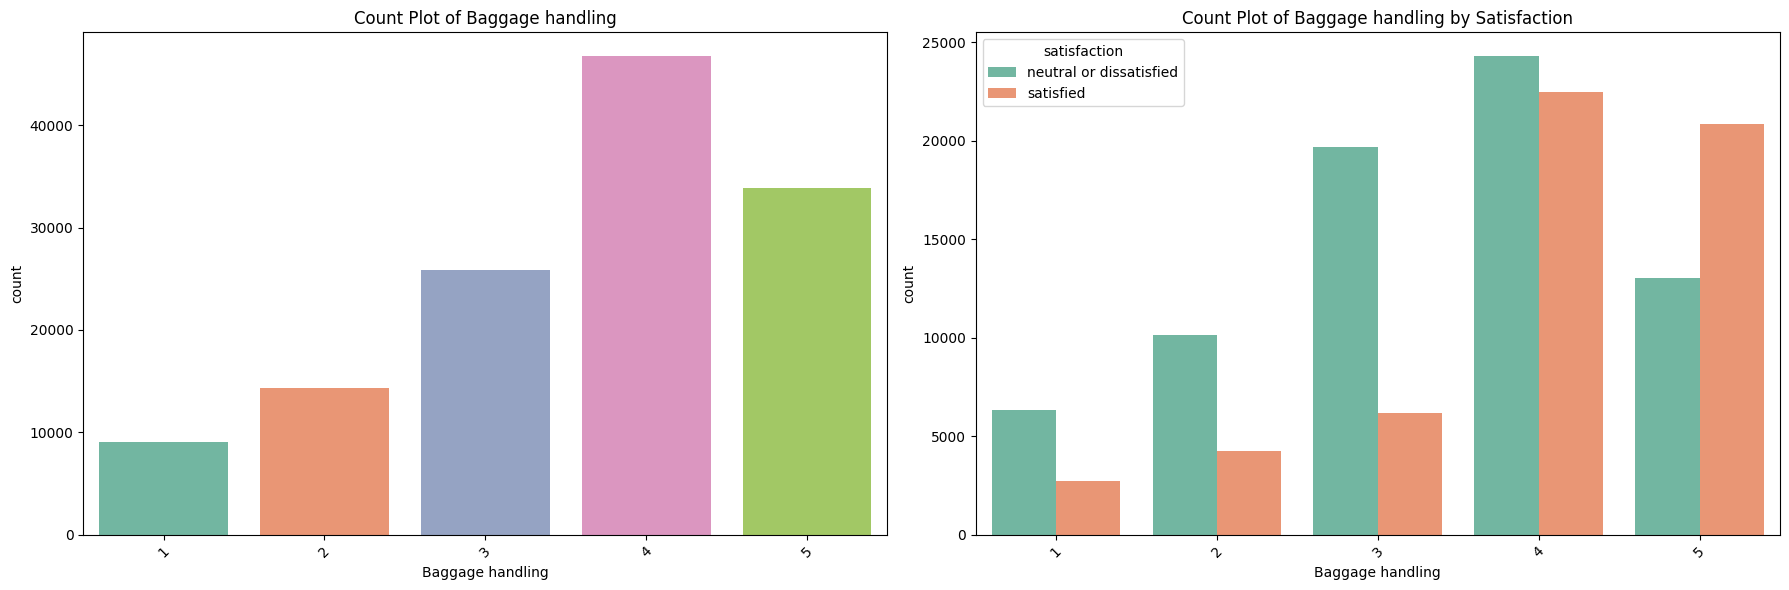

C:\Users\EL-Bustan\AppData\Local\Temp\ipykernel_12884\364561604.py:17: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x=feature, hue='satisfaction', data=df, palette=custom_colors)  # 'satisfaction' is your target column


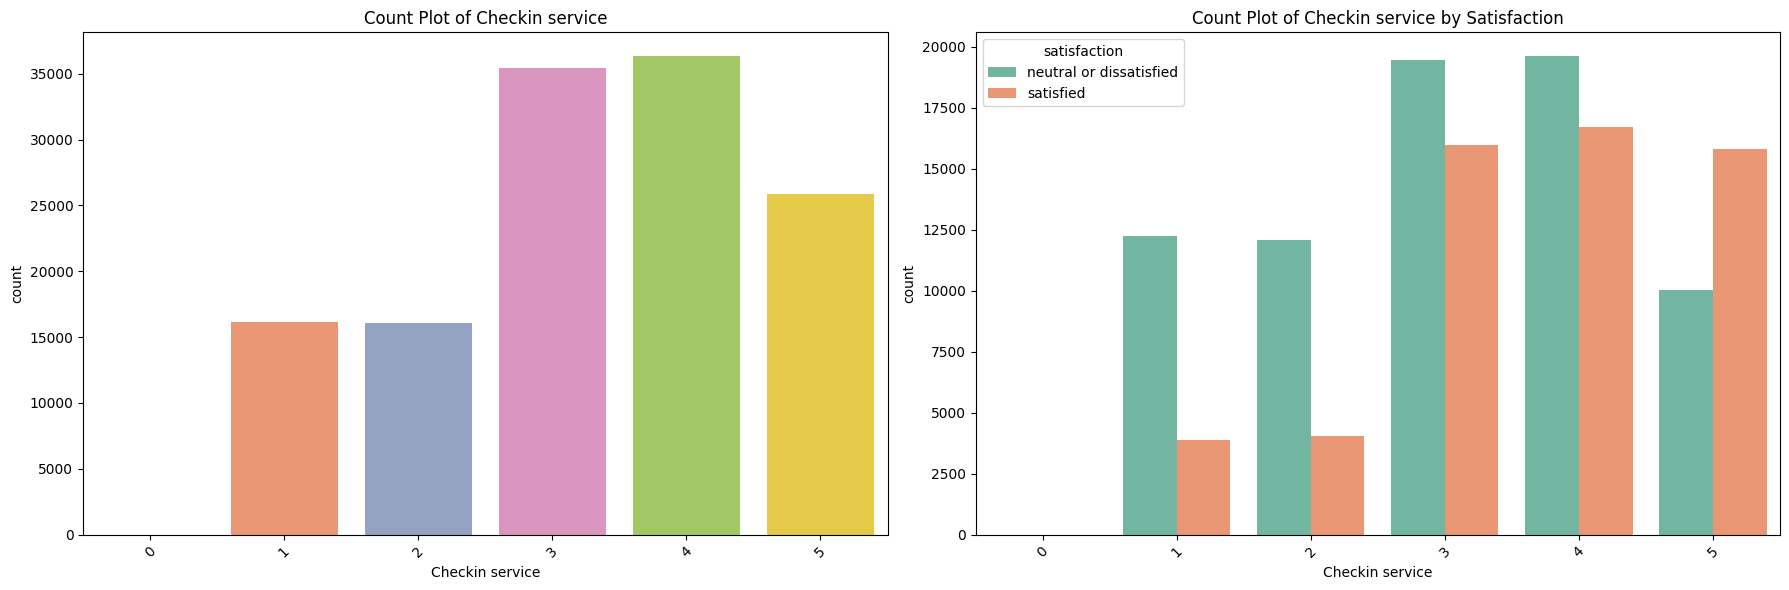

C:\Users\EL-Bustan\AppData\Local\Temp\ipykernel_12884\364561604.py:17: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x=feature, hue='satisfaction', data=df, palette=custom_colors)  # 'satisfaction' is your target column


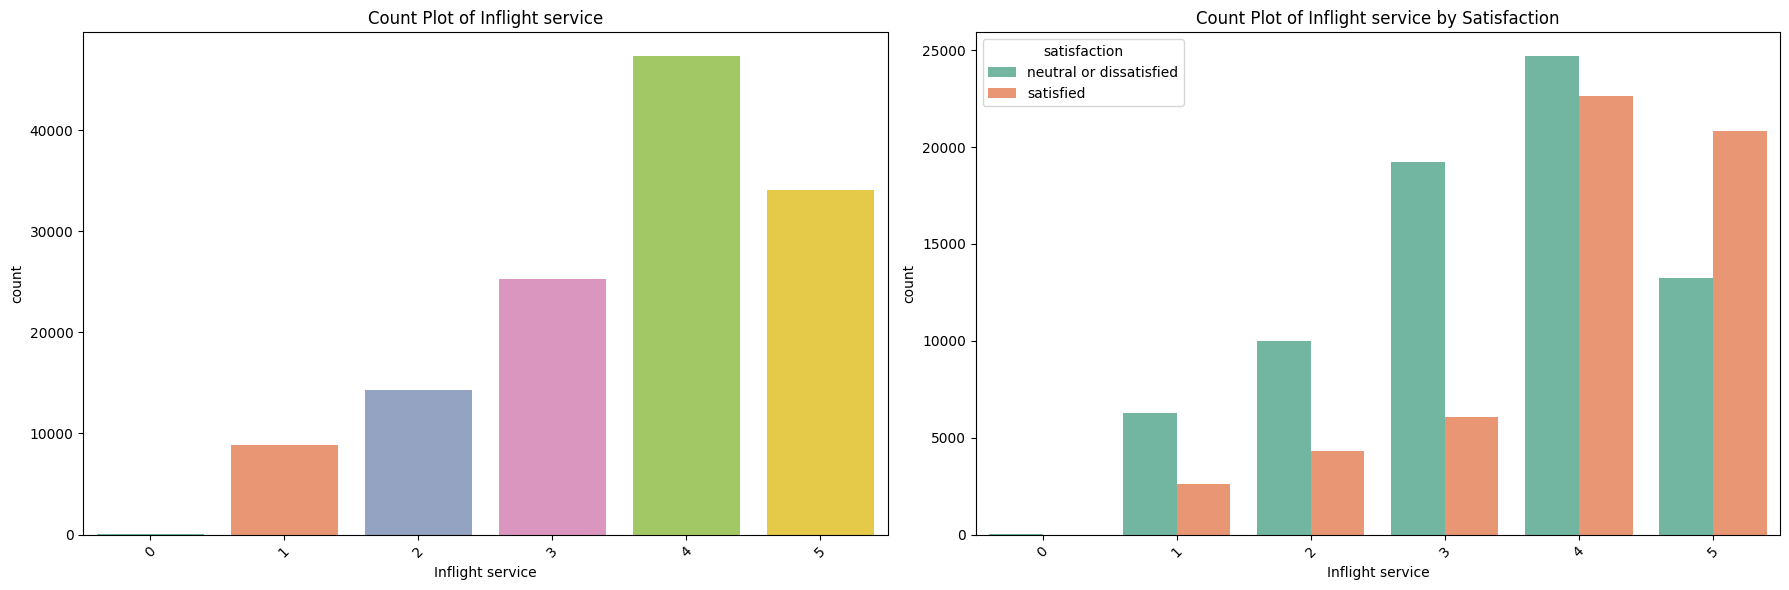

C:\Users\EL-Bustan\AppData\Local\Temp\ipykernel_12884\364561604.py:17: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x=feature, hue='satisfaction', data=df, palette=custom_colors)  # 'satisfaction' is your target column


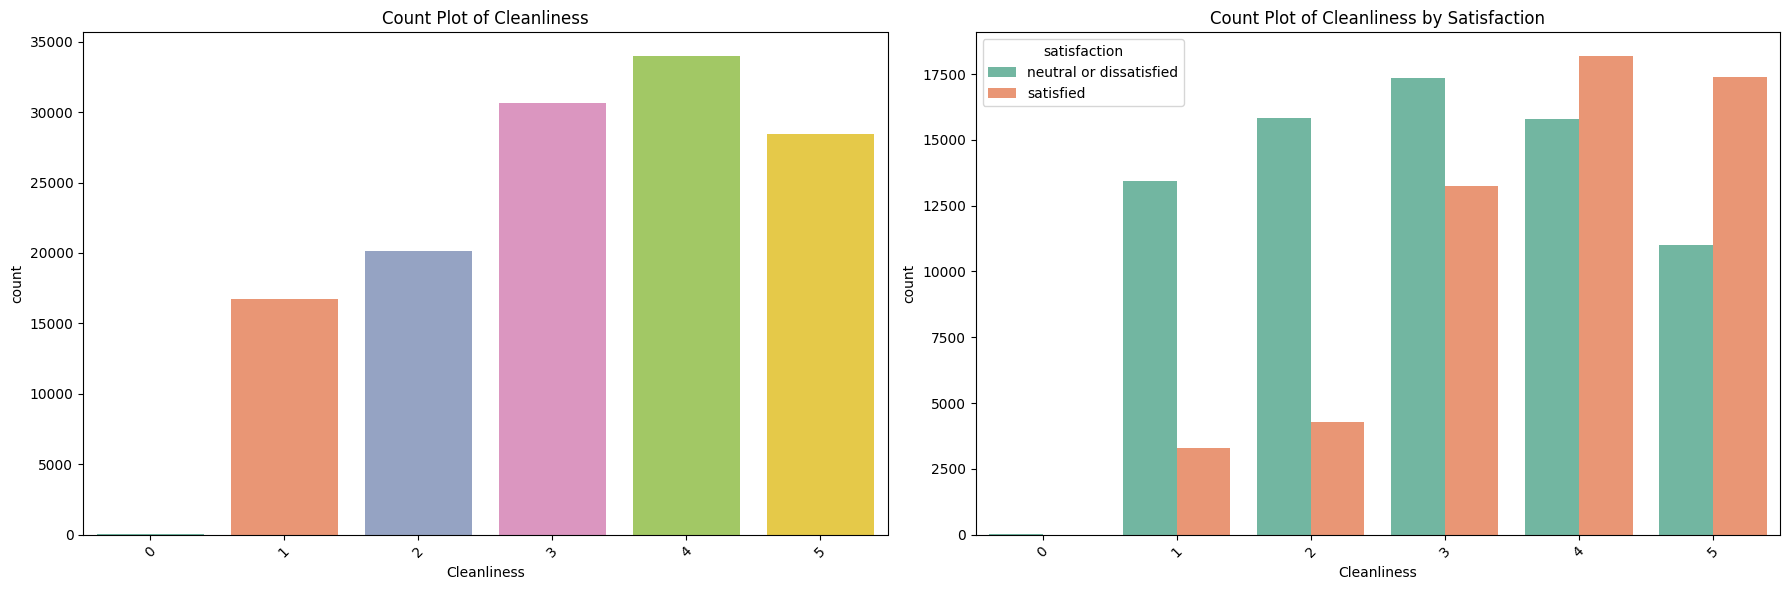

C:\Users\EL-Bustan\AppData\Local\Temp\ipykernel_12884\364561604.py:11: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x=feature, hue=feature, data=df, palette=custom_colors, legend=False)
C:\Users\EL-Bustan\AppData\Local\Temp\ipykernel_12884\364561604.py:17: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x=feature, hue='satisfaction', data=df, palette=custom_colors)  # 'satisfaction' is your target column


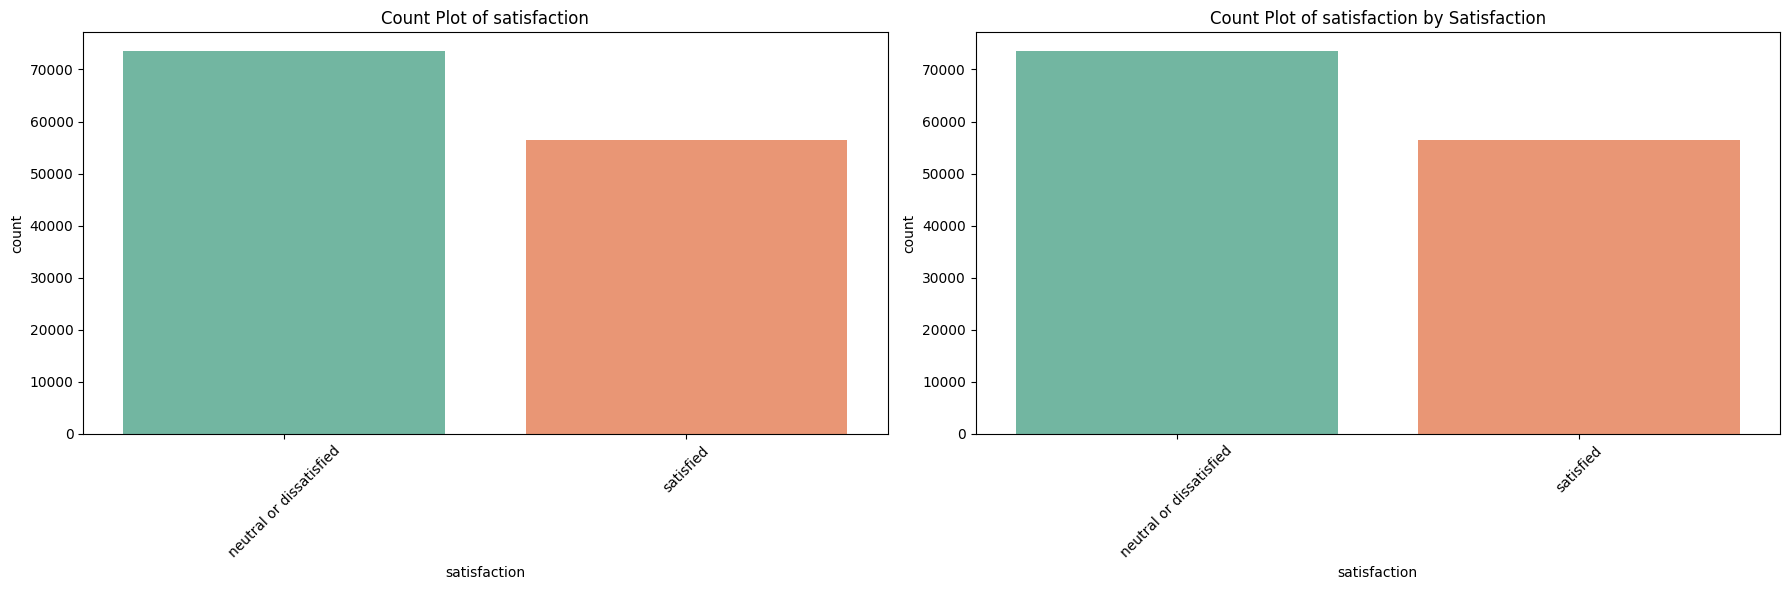

In [21]:

#custom_colors = ['#66c2a5', '#fc8d62']  

custom_colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f']

# Assuming `df` is your DataFrame and `categorical_columns` is the list of categorical features
for feature in ctegorical_columns:
    plt.figure(figsize=(18, 6))  # Adjust the figure size as needed
    
    # First subplot: Count plot of the feature without the target
    plt.subplot(1, 2, 1)
    sns.countplot(x=feature, hue=feature, data=df, palette=custom_colors, legend=False)
    plt.title(f'Count Plot of {feature}')
    plt.xticks(rotation=45)
    
    # Second subplot: Count plot of the feature with the target
    plt.subplot(1, 2, 2)
    sns.countplot(x=feature, hue='satisfaction', data=df, palette=custom_colors)  # 'satisfaction' is your target column
    plt.title(f'Count Plot of {feature} by Satisfaction')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()


**.** Loyal Customer has high Satsatisfaction average.

**.** Type of travel (Bussiness and Personnal), Airline should imporve personal type becouse from our visualition they neutural or dissatisfied.

**.** Class : passengers who has Bussiness Class satisfied more than others, that indicate Airlines company should invest more in Eco Plus class and Eco.
we see that number of not Bussiness is equal to Bussiness class, airlines company should do plan to can satisfy those passengers. 


### Feature Engneering


In [22]:
df['total_dealy']=df['Arrival Delay in Minutes']+df['Departure Delay in Minutes']
if 'total_dealy' not in numerical_columns:
    numerical_columns.append('total_dealy')

In [23]:
numerical_columns

['Arrival Delay in Minutes',
 'Departure Delay in Minutes',
 'Flight Distance',
 'Age',
 'total_dealy']

In [24]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'total_dealy'],
      dtype='object')

### Missing Values

>Many machine learning algorithms fail if the dataset contains missing values. However, algorithms like K-nearest and Naive Bayes support data with missing values. You may end up building a biased machine learning model, leading to incorrect results if the missing values are not handled properly.

In [25]:
pd.DataFrame(df['Arrival Delay in Minutes'].describe())

,Arrival Delay in Minutes
count,129487.000000
mean,15.091129
std,38.465650
min,0.000000
25%,0.000000
50%,0.000000
75%,13.000000
max,1584.000000


In [26]:
df['Arrival Delay in Minutes'].isnull().sum()/len(df['Arrival Delay in Minutes'])

0.003025870033877425

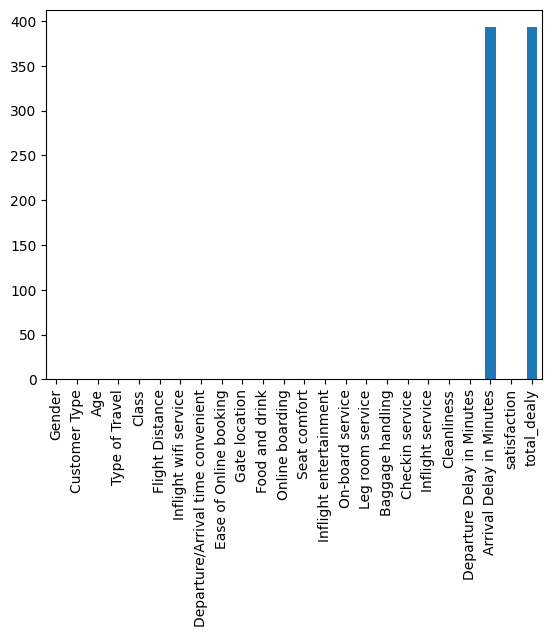

In [27]:
df.isnull().sum().plot(kind='bar')
plt.show()

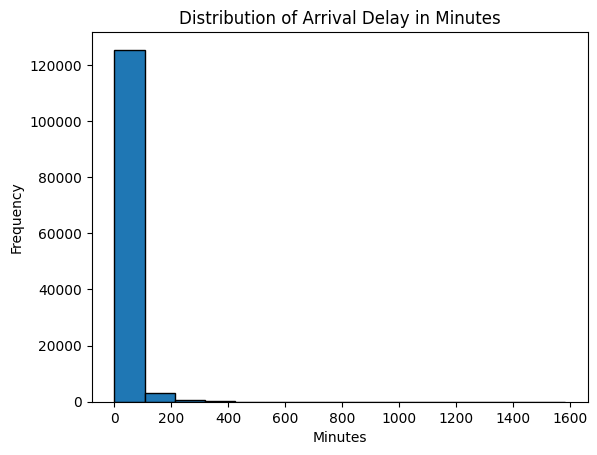

In [28]:

df['Arrival Delay in Minutes'].plot(kind='hist', bins=15, edgecolor='black')
plt.title('Distribution of Arrival Delay in Minutes')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.show()

In [29]:
from sklearn.impute import KNNImputer

# Create a KNN imputer object
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the data
df['Arrival Delay in Minutes'] = imputer.fit_transform(df[['Arrival Delay in Minutes']])
df['total_dealy'] = imputer.fit_transform(df[['total_dealy']])

In [30]:
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
total_dealy                          0
dtype: int64

However, the way they calculate the missing values is the same their goal is different. Interpolation is often applied when the missing values are expected to follow a smooth or continuous pattern. Imputation is often applied to preserve the overall structure and statistical properties of the dataset.

### Outliers

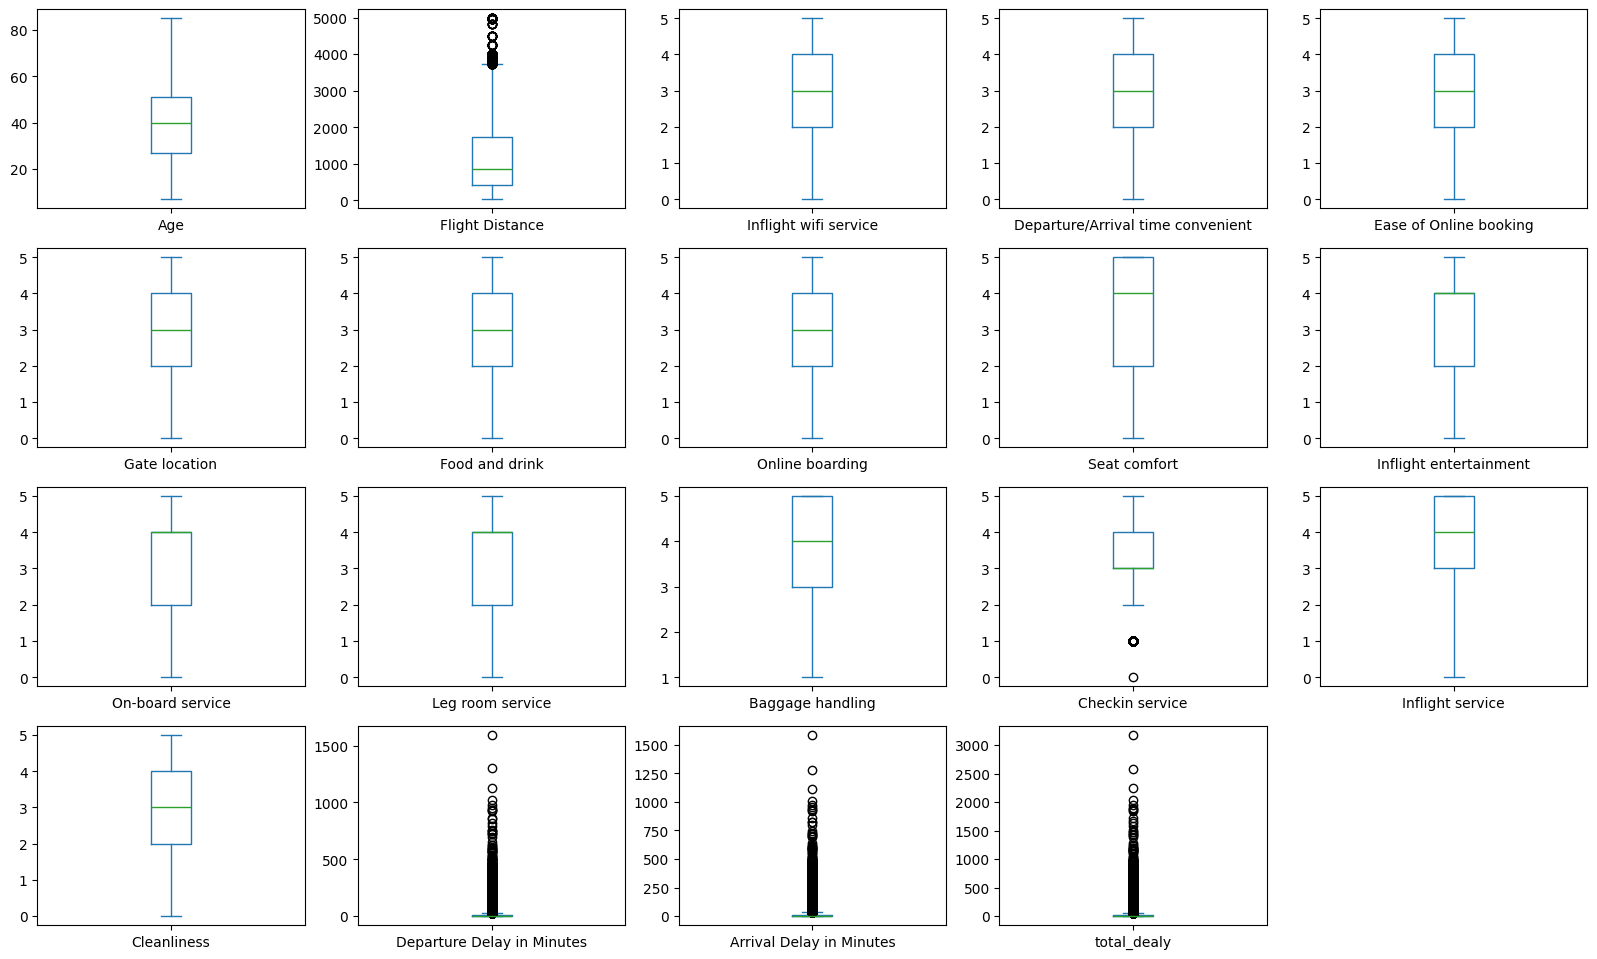

In [31]:
#check outliers
df.plot(kind = "box" , subplots = True , figsize = (20,15) ,  layout = (5,5))
plt.show()

visualisation show us that data have small amount of outliers

In [32]:
def calculate_outliers(df):
    outlier_flags = pd.DataFrame(False, index=df.index, columns=df.columns)
    for column in numerical_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_flags[column] = (df[column] < lower_bound) | (df[column] > upper_bound)
        num_outliers = outlier_flags[column].sum()
        percentage_outliers = (num_outliers / df.shape[0]) * 100
        print(f"Feature '{column}': {num_outliers} outliers ({percentage_outliers:.2f}%)")
    rows_with_outliers = outlier_flags.any(axis=1).sum()
    percentage_rows_with_outliers = (rows_with_outliers / df.shape[0]) * 100
   # print(f"\nTotal rows with outliers: {rows_with_outliers} ({percentage_rows_with_outliers:.2f}%)")
    return outlier_flags

# Call the function
outlier_flags = calculate_outliers(df)

Feature 'Arrival Delay in Minutes': 17492 outliers (13.47%)
Feature 'Departure Delay in Minutes': 18098 outliers (13.93%)
Feature 'Flight Distance': 2855 outliers (2.20%)
Feature 'Age': 0 outliers (0.00%)
Feature 'total_dealy': 17771 outliers (13.68%)


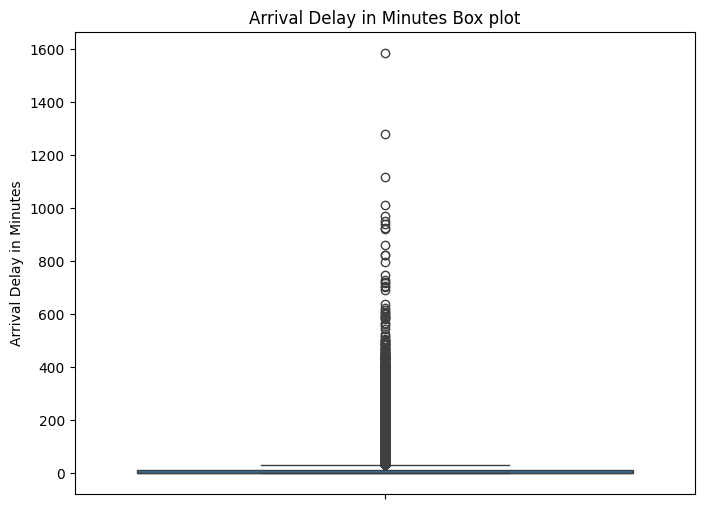

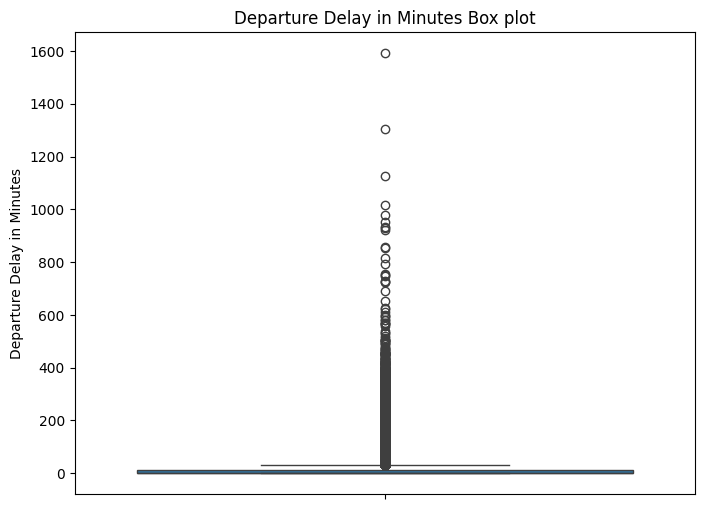

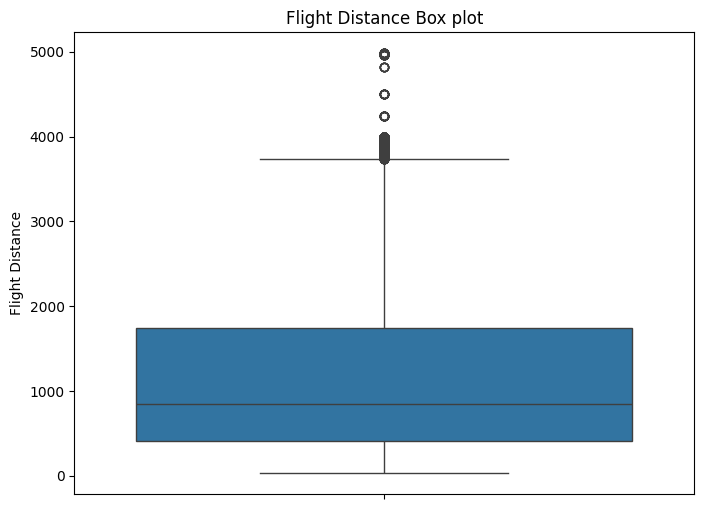

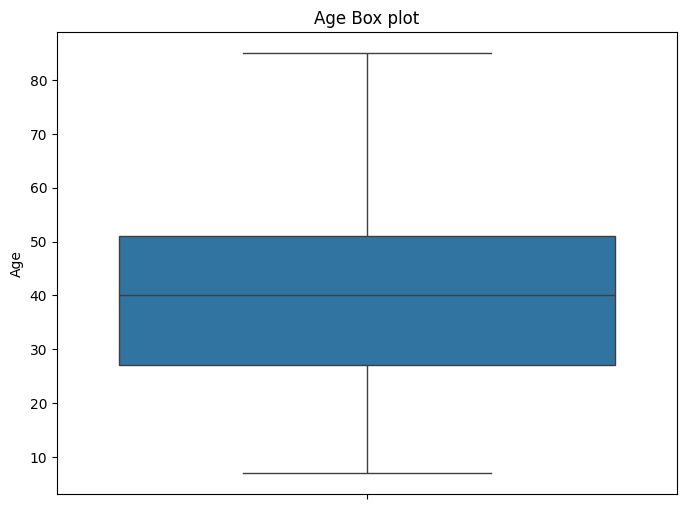

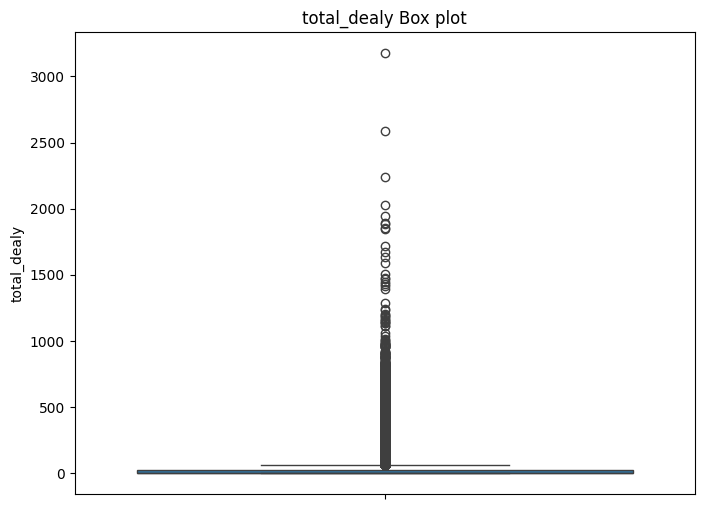

In [33]:
for col in numerical_columns:
   plt.figure(figsize=(8, 6))
   sns.boxplot(data= df[col])
   plt.title(f'{col} Box plot')
   #plt.show()

In [34]:
df[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Arrival Delay in Minutes,129880.0,15.091129,38.407410,0.0,0.0,0.0,13.0,1584.0
Departure Delay in Minutes,129880.0,14.713713,38.071126,0.0,0.0,0.0,12.0,1592.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.0,844.0,1744.0,4983.0
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
total_dealy,129880.0,29.734514,75.618056,0.0,0.0,2.0,24.0,3176.0


In [35]:
df[numerical_columns].mode()

,Arrival Delay in Minutes,Departure Delay in Minutes,Flight Distance,Age,total_dealy
0,0.0,0,337,39,0.0


Impute outlier by Median

In [36]:
"""
for column in numerical_columns:
    # Calculate the first and third quartile
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the lower and upper bound for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Impute the outliers with the median
    median = df[column].median()
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median, df[column])
"""

'\nfor column in numerical_columns:\n    # Calculate the first and third quartile\n    Q1 = df[column].quantile(0.25)\n    Q3 = df[column].quantile(0.75)\n    IQR = Q3 - Q1\n    \n    # Define the lower and upper bound for outliers\n    lower_bound = Q1 - 1.5 * IQR\n    upper_bound = Q3 + 1.5 * IQR\n    \n    # Impute the outliers with the median\n    median = df[column].median()\n    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median, df[column])\n'

In [37]:
"""
# Call the function
outlier_flags = calculate_outliers(df)"""

'\n# Call the function\noutlier_flags = calculate_outliers(df)'

Feature 'Arrival Delay in Minutes': 18592 outliers (17.89%)

Feature 'Departure Delay in Minutes': 19930 outliers (19.18%)

Feature 'Flight Distance': 2527 outliers (2.43%)

Feature 'Age': 0 outliers (0.00%)

Total rows with outliers: 30516 (29.37%)

**when we deal with outlier by imputing with median , the total numbers grow**

Try using bins

In [38]:
"""# Define bins and matching labels
bins = [0, 200, 400, 600, 800, 1000,  df['total_dealy'].max()]
labels = ["Very Low Delay", "Low Delay", "Moderate Delay", "High Delay", "Very High Delay", "Severe Delay"]

# Apply the binning
t = pd.cut(df['total_dealy'], bins=bins, labels=labels, include_lowest=True)

# Check the result
print(t.head(),df['total_dealy'].head())

"""

'# Define bins and matching labels\nbins = [0, 200, 400, 600, 800, 1000,  df[\'total_dealy\'].max()]\nlabels = ["Very Low Delay", "Low Delay", "Moderate Delay", "High Delay", "Very High Delay", "Severe Delay"]\n\n# Apply the binning\nt = pd.cut(df[\'total_dealy\'], bins=bins, labels=labels, include_lowest=True)\n\n# Check the result\nprint(t.head(),df[\'total_dealy\'].head())\n\n'

In [39]:
df.drop(df[df['total_dealy']>300].index,axis=0,inplace=True)

In [40]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'total_dealy'],
      dtype='object')

In [41]:

# Call the function
outlier_flags = calculate_outliers(df)

Feature 'Arrival Delay in Minutes': 16318 outliers (12.83%)
Feature 'Departure Delay in Minutes': 17660 outliers (13.89%)
Feature 'Flight Distance': 2785 outliers (2.19%)
Feature 'Age': 0 outliers (0.00%)
Feature 'total_dealy': 16983 outliers (13.36%)


In [42]:
numerical_columns

['Arrival Delay in Minutes',
 'Departure Delay in Minutes',
 'Flight Distance',
 'Age',
 'total_dealy']

## Correlations

<Axes: >

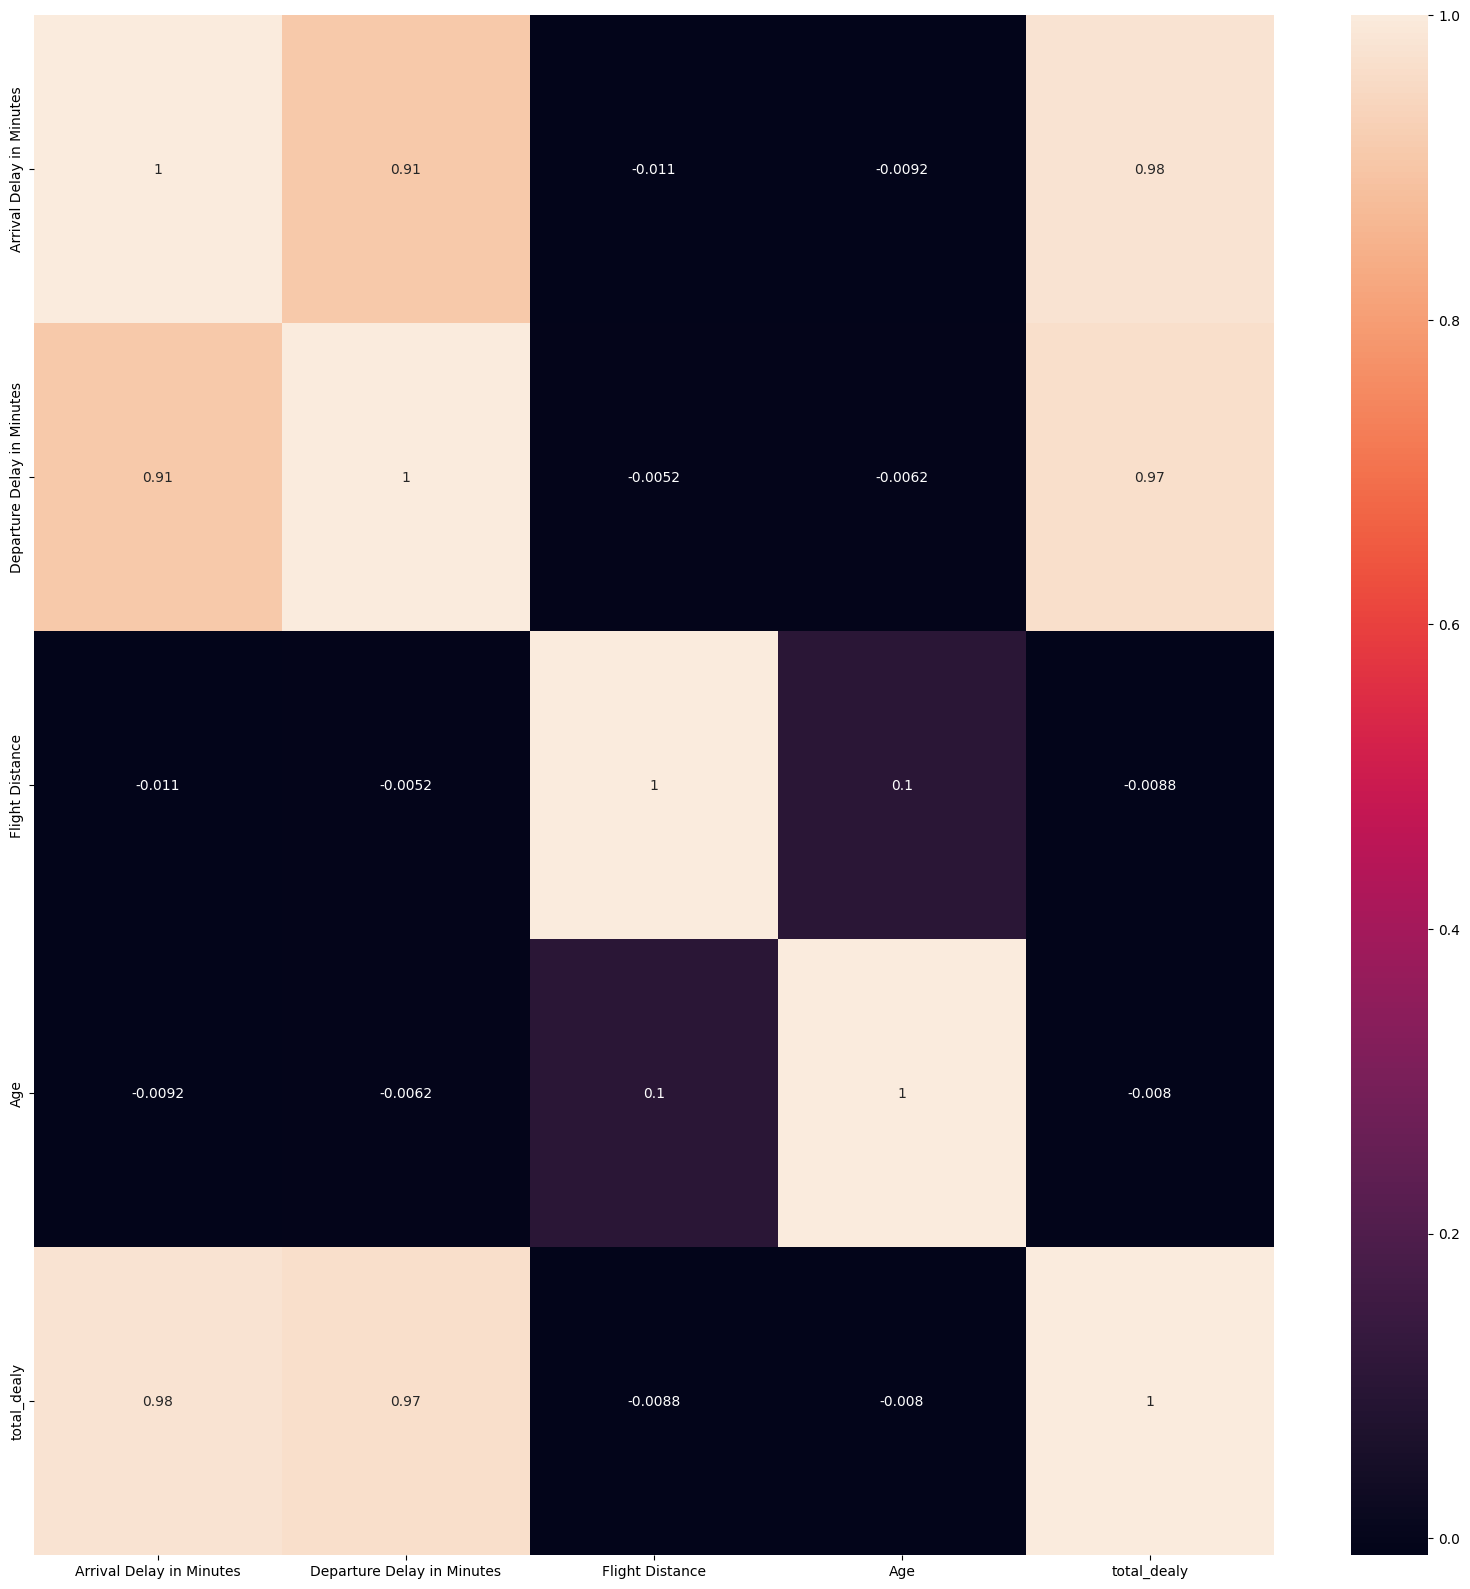

In [43]:
plt.subplots(figsize=(20,20))
sns.heatmap(df[numerical_columns].corr(), annot=True)

from correlation matrix total_delay and Arrival/Departure have high correlation

### Feature Selection

In [44]:
df.drop(['Arrival Delay in Minutes', 'Departure Delay in Minutes'], axis=1, inplace=True, errors='ignore')


In [45]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'satisfaction', 'total_dealy'],
      dtype='object')

# Encoding

In [46]:
ctegorical_columns

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,3,4,3,1,5,3,5,5,4,3,4,4,5,5,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,3,2,3,3,1,3,1,1,1,5,3,1,4,1,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,2,2,2,2,5,5,5,5,4,3,4,4,4,5,satisfied
3,Female,Loyal Customer,Business travel,Business,2,5,5,5,2,2,2,2,2,5,3,1,4,2,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,3,3,3,3,4,5,5,3,3,4,4,3,3,3,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,Business travel,Business,3,3,3,1,4,3,4,4,3,2,4,4,5,4,neutral or dissatisfied
25972,Male,Loyal Customer,Business travel,Business,4,4,4,4,4,4,4,4,4,5,5,5,5,4,satisfied
25973,Female,Loyal Customer,Personal Travel,Eco,2,5,1,5,2,1,2,2,4,3,4,5,4,2,neutral or dissatisfied
25974,Male,Loyal Customer,Business travel,Business,3,3,3,3,4,4,4,4,3,2,5,4,5,4,satisfied


In [47]:
nominal=["satisfaction","Gender","Customer Type","Type of Travel","Class"]
ordinal_cols = df.columns.difference(nominal)

print(ordinal_cols)


Index(['Age', 'Baggage handling', 'Checkin service', 'Cleanliness',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Flight Distance', 'Food and drink', 'Gate location',
       'Inflight entertainment', 'Inflight service', 'Inflight wifi service',
       'Leg room service', 'On-board service', 'Online boarding',
       'Seat comfort', 'total_dealy'],
      dtype='object')


In [48]:
# example of a ordinal encoding
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
# transform data
df[ordinal_cols] = encoder.fit_transform(df[ordinal_cols])


In [49]:
# example of a ordinal encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
# transform data
for col in nominal:
    df[col] = encoder.fit_transform(df[col])

In [50]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,total_dealy
0,1,0,6.0,1,2,359.0,3.0,4.0,3.0,1.0,...,4.0,5.0,4.0,3.0,3.0,3.0,5.0,5.0,0,44.0
1,1,1,18.0,0,0,144.0,3.0,2.0,3.0,3.0,...,0.0,1.0,1.0,5.0,2.0,0.0,4.0,1.0,0,7.0
2,0,0,19.0,0,0,1004.0,2.0,2.0,2.0,2.0,...,4.0,5.0,4.0,3.0,3.0,3.0,4.0,5.0,1,0.0
3,0,0,18.0,0,0,447.0,2.0,5.0,5.0,5.0,...,1.0,2.0,2.0,5.0,2.0,0.0,4.0,2.0,0,20.0
4,1,0,54.0,0,0,124.0,3.0,3.0,3.0,3.0,...,4.0,3.0,3.0,4.0,3.0,2.0,3.0,3.0,1,0.0


In [51]:
df_copy=df.copy()
X = df_copy.drop(["satisfaction"], axis= 1)
Y = df_copy["satisfaction"]

##  Chi2 Score

In [52]:
from sklearn.feature_selection import mutual_info_classif, SelectFromModel, RFE
from sklearn.feature_selection import chi2, f_classif, SelectKBest


# Apply chi-square test
chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X, Y)

# Get scores and p-values
chi2_scores = chi2_selector.scores_
p_values = chi2_selector.pvalues_

# Create a DataFrame to display feature scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi2_scores,
    'P-Value': p_values
}).sort_values(by='Chi2 Score', ascending=False)

print(feature_scores)

                              Feature    Chi2 Score       P-Value
5                     Flight Distance  9.936209e+06  0.000000e+00
20                        total_dealy  5.898498e+04  0.000000e+00
11                    Online boarding  1.804176e+04  0.000000e+00
3                      Type of Travel  1.780885e+04  0.000000e+00
4                               Class  1.662178e+04  0.000000e+00
2                                 Age  1.599087e+04  0.000000e+00
12                       Seat comfort  1.094372e+04  0.000000e+00
13             Inflight entertainment  1.074757e+04  0.000000e+00
6               Inflight wifi service  6.611173e+03  0.000000e+00
14                   On-board service  6.578323e+03  0.000000e+00
15                   Leg room service  6.538100e+03  0.000000e+00
19                        Cleanliness  6.219658e+03  0.000000e+00
17                    Checkin service  4.861682e+03  0.000000e+00
16                   Baggage handling  4.190749e+03  0.000000e+00
1         

based on chi square , we will drop Low Chi-Square Scores & High P-Values: Gender and Gate location have very low Chi-square scores and p-values. 


In [53]:
df.drop(['Gender','Gate location'],axis=1,inplace=True)
X.drop(['Gender','Gate location'],axis=1,inplace=True)

# Scaling 

## Normalization

In [54]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

Normalizer = MinMaxScaler()
x_nor = Normalizer.fit_transform(X)

x_normalized = pd.DataFrame(data = x_nor, columns= X.columns)

x_normalized

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,total_dealy
0,0.0,0.081081,1.0,1.0,0.094028,0.6,0.8,0.6,1.0,0.6,1.00,1.0,0.8,0.6,0.75,0.75,1.0,1.0,0.146179
1,1.0,0.243243,0.0,0.0,0.037716,0.6,0.4,0.6,0.2,0.6,0.00,0.2,0.2,1.0,0.50,0.00,0.8,0.2,0.023256
2,0.0,0.256757,0.0,0.0,0.262965,0.4,0.4,0.4,1.0,1.0,1.00,1.0,0.8,0.6,0.75,0.75,0.8,1.0,0.000000
3,0.0,0.243243,0.0,0.0,0.117077,0.4,1.0,1.0,0.4,0.4,0.25,0.4,0.4,1.0,0.50,0.00,0.8,0.4,0.066445
4,0.0,0.729730,0.0,0.0,0.032478,0.6,0.6,0.6,0.8,1.0,1.00,0.6,0.6,0.8,0.75,0.50,0.6,0.6,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127146,1.0,0.364865,0.0,0.0,0.109219,0.6,0.6,0.6,0.8,0.6,0.75,0.8,0.6,0.4,0.75,0.75,1.0,0.8,0.000000
127147,0.0,0.216216,0.0,0.0,0.138292,0.8,0.8,0.8,0.8,0.8,0.75,0.8,0.8,1.0,1.00,1.00,1.0,0.8,0.000000
127148,0.0,0.135135,1.0,0.5,0.183342,0.4,1.0,0.2,0.4,0.2,0.25,0.4,0.8,0.6,0.75,1.00,0.8,0.4,0.000000
127149,0.0,0.094595,0.0,0.0,0.259036,0.6,0.6,0.6,0.8,0.8,0.75,0.8,0.6,0.4,1.00,0.75,1.0,0.8,0.000000


## Standarization

In [55]:
standscaler = StandardScaler()
x_stand = standscaler.fit_transform(df)

x_standarized = pd.DataFrame(data = x_stand, columns= df.columns)

x_standarized

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,total_dealy
0,-0.473206,-1.748508,1.492265,2.263092,-0.721959,0.203183,0.616870,0.172983,1.347606,-0.187511,1.179937,1.228223,0.477553,-0.262252,0.312428,0.547930,1.151144,1.304978,-0.878293,0.440987
1,2.113245,-0.954799,-0.670122,-0.955385,-0.945631,0.203183,-0.692858,0.172983,-1.661599,-0.187511,-1.854363,-1.769407,-1.854625,1.254422,-0.533877,-1.824295,0.298912,-1.741509,-0.878293,-0.346101
2,-0.473206,-0.888657,-0.670122,-0.955385,-0.050945,-0.548552,-0.692858,-0.540190,1.347606,1.293419,1.179937,1.228223,0.477553,-0.262252,0.312428,0.547930,0.298912,1.304978,1.138572,-0.495010
3,-0.473206,-0.954799,-0.670122,-0.955385,-0.630410,-0.548552,1.271735,1.599329,-0.909298,-0.927977,-1.095788,-1.020000,-1.077233,1.254422,-0.533877,-1.824295,0.298912,-0.979888,-0.878293,-0.069557
4,-0.473206,1.426328,-0.670122,-0.955385,-0.966437,0.203183,-0.037994,0.172983,0.595304,1.293419,1.179937,-0.270592,-0.299840,0.496085,0.312428,-0.242812,-0.553320,-0.218266,1.138572,-0.495010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127146,2.113245,-0.359518,-0.670122,-0.955385,-0.661620,0.203183,-0.037994,0.172983,0.595304,-0.187511,0.421362,0.478816,-0.299840,-1.020589,0.312428,0.547930,1.151144,0.543356,-0.878293,-0.495010
127147,-0.473206,-1.087084,-0.670122,-0.955385,-0.546143,0.954917,0.616870,0.886156,0.595304,0.552954,0.421362,0.478816,0.477553,1.254422,1.158734,1.338672,1.151144,0.543356,1.138572,-0.495010
127148,-0.473206,-1.483939,1.492265,0.653853,-0.367206,-0.548552,1.271735,-1.253363,-0.909298,-1.668442,-1.095788,-1.020000,0.477553,-0.262252,0.312428,1.338672,0.298912,-0.979888,-0.878293,-0.495010
127149,-0.473206,-1.682366,-0.670122,-0.955385,-0.066550,0.203183,-0.037994,0.172983,0.595304,0.552954,0.421362,0.478816,-0.299840,-1.020589,1.158734,0.547930,1.151144,0.543356,1.138572,-0.495010


## Robust Scaling

In [56]:

Robust = RobustScaler()
x_rob = Robust.fit_transform(df)

x_robust = pd.DataFrame(data = x_rob, columns= df.columns)

x_robust

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,total_dealy
0,0.0,-1.125000,1.0,1.0,-0.286634,0.0,0.5,0.0,1.0,0.0,0.333333,0.5,0.0,-0.5,0.0,1.0,0.5,1.0,0.0,1.909091
1,1.0,-0.625000,0.0,-1.0,-0.459742,0.0,-0.5,0.0,-1.0,0.0,-1.000000,-1.5,-1.5,0.5,-0.5,-2.0,0.0,-1.0,0.0,0.227273
2,0.0,-0.583333,0.0,-1.0,0.232689,-0.5,-0.5,-0.5,1.0,1.0,0.333333,0.5,0.0,-0.5,0.0,1.0,0.0,1.0,1.0,-0.090909
3,0.0,-0.625000,0.0,-1.0,-0.215781,-0.5,1.0,1.0,-0.5,-0.5,-0.666667,-1.0,-1.0,0.5,-0.5,-2.0,0.0,-0.5,0.0,0.818182
4,0.0,0.875000,0.0,-1.0,-0.475845,0.0,0.0,0.0,0.5,1.0,0.333333,-0.5,-0.5,0.0,0.0,0.0,-0.5,0.0,1.0,-0.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127146,1.0,-0.250000,0.0,-1.0,-0.239936,0.0,0.0,0.0,0.5,0.0,0.000000,0.0,-0.5,-1.0,0.0,1.0,0.5,0.5,0.0,-0.090909
127147,0.0,-0.708333,0.0,-1.0,-0.150564,0.5,0.5,0.5,0.5,0.5,0.000000,0.0,0.0,0.5,0.5,2.0,0.5,0.5,1.0,-0.090909
127148,0.0,-0.958333,1.0,0.0,-0.012077,-0.5,1.0,-1.0,-0.5,-1.0,-0.666667,-1.0,0.0,-0.5,0.0,2.0,0.0,-0.5,0.0,-0.090909
127149,0.0,-1.083333,0.0,-1.0,0.220612,0.0,0.0,0.0,0.5,0.5,0.000000,0.0,-0.5,-1.0,0.5,1.0,0.5,0.5,1.0,-0.090909


In [57]:
X = x_normalized


# Modeling

##  Logistic Regression

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

        # Plotting the confusion matrix
        cm = confusion_matrix(y_test, pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=['Class 0', 'Class 1'], 
                    yticklabels=['Class 0', 'Class 1'])
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title('Confusion Matrix (Test Data)')
        plt.show()

Train Result:
Accuracy Score: 87.43%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy      macro avg   weighted avg
precision      0.876650      0.871037  0.874302       0.873843       0.874202
recall         0.904343      0.835456  0.874302       0.869899       0.874302
f1-score       0.890281      0.852876  0.874302       0.871578       0.873969
support    57361.000000  44359.000000  0.874302  101720.000000  101720.000000
_______________________________________________
Confusion Matrix: 
 [[51874  5487]
 [ 7299 37060]]

Test Result:
Accuracy Score: 87.61%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.883153      0.866331  0.876057      0.874742      0.875869
recall         0.900548      0.843988  0.876057      0.872268      0.876057
f1-score       0.891766      0.855014  0.876057      0.873390      

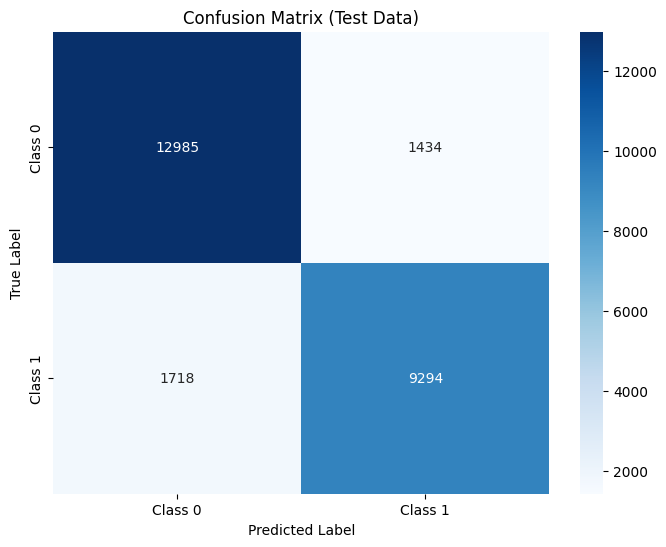

In [61]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(x_train, y_train)

print_score(lr_clf, x_train, y_train, x_test, y_test, train=True)
print_score(lr_clf, x_train, y_train, x_test, y_test, train=False)

In [62]:
test_score = accuracy_score(y_test, lr_clf.predict(x_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(x_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,87.430201,87.605678


## K-nearest neighbors

Train Result:
Accuracy Score: 95.26%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy      macro avg   weighted avg
precision      0.940242      0.970199  0.952625       0.955221       0.953306
recall         0.978156      0.919610  0.952625       0.948883       0.952625
f1-score       0.958824      0.944228  0.952625       0.951526       0.952459
support    57361.000000  44359.000000  0.952625  101720.000000  101720.000000
_______________________________________________
Confusion Matrix: 
 [[56108  1253]
 [ 3566 40793]]

Test Result:
Accuracy Score: 93.53%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.922812      0.953608  0.935315      0.938210      0.936147
recall         0.966780      0.894116  0.935315      0.930448      0.935315
f1-score       0.944285      0.922904  0.935315      0.933594      

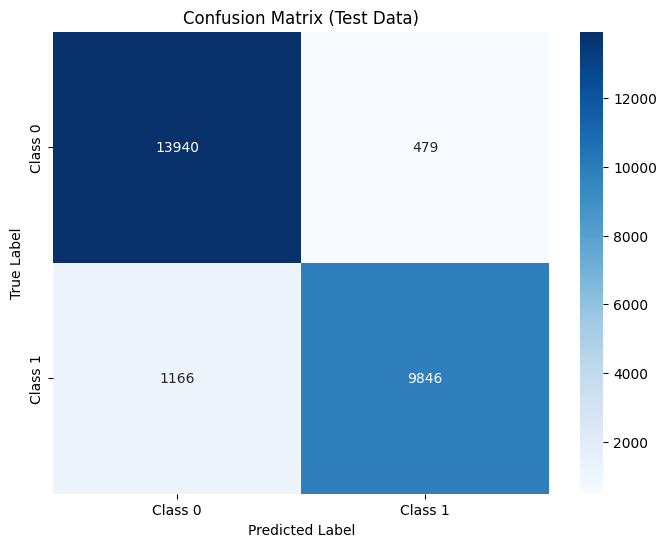

In [63]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)

print_score(knn_clf, x_train, y_train, x_test, y_test, train=True)
print_score(knn_clf, x_train, y_train, x_test, y_test, train=False)

In [64]:
test_score = accuracy_score(y_test, knn_clf.predict(x_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(x_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,87.430201,87.605678
1,K-nearest neighbors,95.262485,93.531517


## Support Vector Machine

Train Result:
Accuracy Score: 93.83%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy      macro avg   weighted avg
precision      0.933710      0.944614  0.938301       0.939162       0.938465
recall         0.958648      0.911991  0.938301       0.935319       0.938301
f1-score       0.946015      0.928016  0.938301       0.937015       0.938166
support    57361.000000  44359.000000  0.938301  101720.000000  101720.000000
_______________________________________________
Confusion Matrix: 
 [[54989  2372]
 [ 3904 40455]]

Test Result:
Accuracy Score: 93.79%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.934719      0.942236  0.937871      0.938477      0.937974
recall         0.957279      0.912459  0.937871      0.934869      0.937871
f1-score       0.945864      0.927108  0.937871      0.936486      

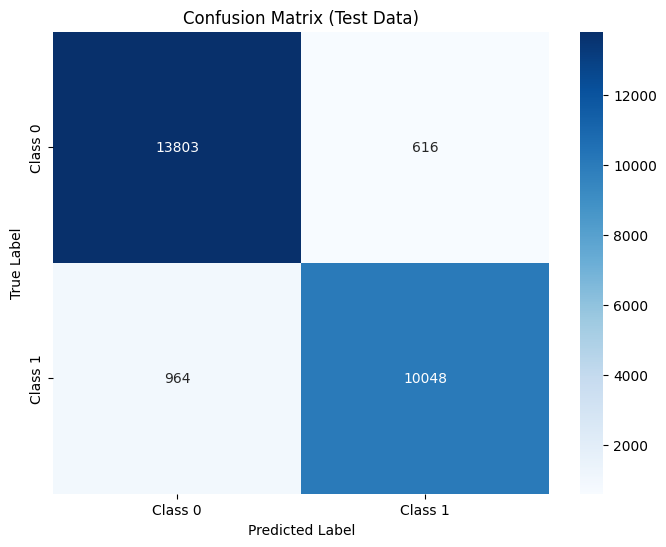

In [65]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(x_train, y_train)

print_score(svm_clf, x_train, y_train, x_test, y_test, train=True)
print_score(svm_clf, x_train, y_train, x_test, y_test, train=False)

In [66]:
test_score = accuracy_score(y_test, svm_clf.predict(x_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(x_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)

results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,87.430201,87.605678
1,K-nearest neighbors,95.262485,93.531517
2,Support Vector Machine,93.830122,93.787110


# Refrances

>[Dataset on Kaggle](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction)

>[Handling missing data in pandas — [Part 2]](https://medium.com/@abhishekjainindore24/handling-missing-data-in-pandas-part-2-8d06c4075bb6)

>[SVM](https://dataaspirant.com/svm-kernels/)